In [1]:
import numpy as np
import pandas as pd
import re, os
import time
import matplotlib.pyplot as plt
%matplotlib inline

Colorblind-friendly palette

In [72]:
plt.style.use('tableau-colorblind10')

Set `projdir` on your system, then everything else is defined relative to that. `pwd` will just give the directory that this Jupyter notebook is housed in.

In [2]:
projdir = os.getcwd()
plotdir = projdir + "/../ciam-code/figures"

set up local directories where the results files are

In [3]:
#dir_gams = "/Users/lisarennels/JuliaProjects/CIAMPaper/local-data/gams-outputs/gams-results"
#dir_julia = "/Users/lisarennels/JuliaProjects/CIAMPaper/CIAM_uncertainty_propagation/ciam-code/output/baseline_comparisons"
dir_gams = "/Users/aewsma/codes/CIAM_uncertainty_propagation/ciam-code/output/originalCIAM_gams_outputs/gams-results"
dir_julia = "/Users/aewsma/codes/CIAM_uncertainty_propagation/ciam-code/output/baseline_comparisons"

## RCP8.5 baseline results from Diaz 2016

file names

In [8]:
files_rcp85 = ["rcp85p50ref"+str(k)+".csv" for k in range(1,11)]

read the files, place in a list of Pandas DataFrames

In [9]:
dfG_all = []
for file in files_rcp85:
    dfG_all.append(pd.read_csv(dir_gams+"/rcp85/"+file))

concatenate all into a master file. don't worry about the times being out of order; the calculations will specify the year and type of damages to be summed up later

In [10]:
dfG = pd.concat(dfG_all)

remove the list of DataFrames to save on some memory

In [11]:
del dfG_all

fix the segment names with apostrophes in them

In [12]:
for seg in dfG.segments.unique():
    if '\'' in seg:
        new_name = seg.replace('\'', '') 
        dfG.loc[(dfG.segments==seg), "segments"] = new_name

Gather up Diaz 2016 results into a DataFrame

In [13]:
NoAdaptCost, OptimalCost, FloodNoAdapt, WetlandNoAdapt, RelocateNoAdapt, StormCapitalNoAdapt, StormPopNoAdapt, WetlandRetreat, WetlandProtect = [], [], [], [], [], [], [], [], []
Construct10, ProtectCost10, StormPopProtect10, StormCapitalProtect10 = [], [], [], []
Construct10000, ProtectCost10000, StormPopProtect10000, StormCapitalProtect10000 = [], [], [], []
RetreatCost10, StormPopRetreat10, StormCapitalRetreat10, RelocateRetreat10 = [], [], [], []
RetreatCost10000, StormPopRetreat10000, StormCapitalRetreat10000, RelocateRetreat10000 = [], [], [], []
for t in range(1,11):
    NoAdaptCost.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="NoAdaptCost"), "value"].sum())
    OptimalCost.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="OptimalFixedCost"), "value"].sum())
    FloodNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="FloodNoAdapt"), "value"].sum())
    WetlandNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="WetlandNoAdapt"), "value"].sum())
    RelocateNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="RelocateNoAdapt"), "value"].sum())
    StormCapitalNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="StormCapitalNoAdapt"), "value"].sum())
    StormPopNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="StormPopNoAdapt"), "value"].sum())
    WetlandRetreat.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="WetlandRetreat"), "value"].sum())
    WetlandProtect.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="WetlandProtect"), "value"].sum())
    Construct10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="ConstructOptimalFixed"), "value"].sum())
    ProtectCost10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="ProtectCost"), "value"].sum())
    StormPopProtect10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormPopProtect"), "value"].sum())
    StormCapitalProtect10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormCapitalProtect"), "value"].sum())
    RetreatCost10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="RetreatCost"), "value"].sum())
    StormPopRetreat10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormPopRetreat"), "value"].sum())
    StormCapitalRetreat10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormCapitalRetreat"), "value"].sum())
    RelocateRetreat10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="RelocateRetreat"), "value"].sum())
    Construct10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="ConstructOptimalFixed"), "value"].sum())
    ProtectCost10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="ProtectCost"), "value"].sum())
    StormPopProtect10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="StormPopProtect"), "value"].sum())
    StormCapitalProtect10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["level"]==10000) & (dfG["variable"]=="StormCapitalProtect"), "value"].sum())
    RetreatCost10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="RetreatCost"), "value"].sum())
    StormPopRetreat10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="StormPopRetreat"), "value"].sum())
    StormCapitalRetreat10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="StormCapitalRetreat"), "value"].sum())
    RelocateRetreat10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="RelocateRetreat"), "value"].sum())

dfDiaz = pd.DataFrame()
dfDiaz["time"] = list(range(2010,2110,10))
dfDiaz["NoAdapt"] = NoAdaptCost
dfDiaz["Optimal"] = OptimalCost
dfDiaz["FloodNoAdapt"] = FloodNoAdapt
dfDiaz["WetlandNoAdapt"] = WetlandNoAdapt
dfDiaz["RelocateNoAdapt"] = RelocateNoAdapt
dfDiaz["StormCapitalNoAdapt"] = StormCapitalNoAdapt
dfDiaz["StormPopNoAdapt"] = StormPopNoAdapt
dfDiaz["WetlandProtect"] = WetlandProtect
dfDiaz["WetlandRetreat"] = WetlandRetreat
dfDiaz["ProtectCost10"] = ProtectCost10
dfDiaz["StormPopProtect10"] = StormPopProtect10
dfDiaz["StormCapitalProtect10"] = StormCapitalProtect10
dfDiaz["RetreatCost10"] = RetreatCost10
dfDiaz["StormPopRetreat10"] = StormPopRetreat10
dfDiaz["StormCapitalRetreat10"] = StormCapitalRetreat10
dfDiaz["RelocateRetreat10"] = RelocateRetreat10
dfDiaz["ProtectCost10000"] = ProtectCost10000
dfDiaz["StormPopProtect10000"] = StormPopProtect10000
dfDiaz["StormCapitalProtect10000"] = StormCapitalProtect10000
dfDiaz["RetreatCost10000"] = RetreatCost10000
dfDiaz["StormPopRetreat10000"] = StormPopRetreat10000
dfDiaz["StormCapitalRetreat10000"] = StormCapitalRetreat10000
dfDiaz["RelocateRetreat10000"] = RelocateRetreat10000

Matches the paper well (Fig 2, right column), except in the last year when things jump up just a bit too much. Paper reports \\$2.2T in the NoAdapt case and \\$270B in the Optimal adaptation case.

In [14]:
print(np.round(dfDiaz[["time","NoAdapt","Optimal"]],2))

   time  NoAdapt  Optimal
0  2010   119.17    29.27
1  2020   189.34    33.03
2  2030   304.23    39.72
3  2040   484.77    52.75
4  2050   787.10   115.54
5  2060  1217.03   132.09
6  2070  1566.37   148.21
7  2080  1878.13   163.73
8  2090  2043.67   178.02
9  2100  2251.46   282.07


## New results

In [4]:
dfC = pd.read_csv(dir_julia + "/ctrl+noConstrFix_global_85p50ssp0fixed.csv")
dfN = pd.read_csv(dir_julia + "/ctrl+noConstrFix_seg_85p50ssp0fixed.csv")
dfO = pd.read_csv(dir_julia + "/ctrl+noConstrFix_seg_85p50ssp0fixed_optimal.csv") # optimal actions for each segment

or, grab results that this notebook previously saved (you'll see this below), but make a copy of these MimiCIAM baseline results

Make some copies so that the new, limited-foresight model version can be compared to old perfect foresight version

In [5]:
dfC1 = dfC.copy()
dfN1 = dfN.copy()
dfO1 = dfO.copy()

If you read from previously processed results, you can skip ahead to "Time for some actual comparisons!" below.

If you obtained this code from Zenodo, you should have the files `dfC.csv`, `dfN.csv`, and `dfO.csv` in the same directory as this Jupyter notebook. Those are from the simulations presented in the study associated with this code repository.

In [6]:
if os.path.isfile("dfC.csv") and os.path.isfile("dfN.csv") and os.path.isfile("dfO.csv"):
    dfC = pd.read_csv("dfC.csv")
    dfN = pd.read_csv("dfN.csv")
    dfO = pd.read_csv("dfO.csv")
    print("Successfully read previously processed results files. Skip ahead to `Time for some actual comparisons!`")
else:
    print("Missing some/all processed results files. \nNeed to run the time-consuming processing below in order to validate against GAMS CIAM implementation.")

Successfully read previously processed results files. Skip ahead to `Time for some actual comparisons!`


## NPV foresight correction

This correction accounts for the fact that the new version of CIAM considers NPV over the current adaptation period (40-50 years generally), whereas the previous GAMS version assumes NPV is known across the entire model time horizon (2000-2100, for example).

#### discount factor 

Matches output from a run model in Julia `m[:slrcost, :discountfactor]`

`v.discountfactor[TimestepIndex(i)] = 1/(1 + p.discountrate)^(p.tstep * (i-1))`

In [12]:
drate = 0.04
tstep = 10
discountfactor = 1/(1+drate)**(tstep*np.arange(0,20,1))
print(discountfactor)

[1.00000000e+00 6.75564169e-01 4.56386946e-01 3.08318668e-01
 2.08289045e-01 1.40712615e-01 9.50604010e-02 6.42194008e-02
 4.33843261e-02 2.93088962e-02 1.98000401e-02 1.33761976e-02
 9.03647984e-03 6.10472199e-03 4.12413144e-03 2.78611543e-03
 1.88219975e-03 1.27154671e-03 8.59011398e-04 5.80317321e-04]


#### segments

In [13]:
segments_G, segments_N = {}, {}
for t in range(1,21):
    segments_G[t] = list(dfG.loc[(dfG.time==t), "segments"].unique())
    segments_N[t] = list(dfN.loc[(dfN.time==t), "segments"].unique())
segments_G["all"] = list(dfG.segments.unique())
segments_N["all"] = list(dfN.segments.unique())

Need to do the first time step separately. it is special because in the "fixed" mode a la original (GAMS) CIAM, this is where the adaptation strategy is determined. This strategy (including level) will be followed throughout the time horizon.

In [14]:
tol= 0.0001
levs = {"RetreatCost" : [1,10,100,1000,10000], "ProtectCost" : [10,100,1000,10000], "NoAdaptCost" : [0]}
options = []
for var in ["RetreatCost","ProtectCost"]:
    for lev in levs[var]:
            options.append(var+str(lev))
options.append("NoAdaptCost0")

### find which segments have a mismatch; otherwise, this fix won't do anything since there's no change to the segment

This takes a while. On a fairly standard desktop workstation (a 2018 Mac Mini with 3.2 Ghz 6-core i7 processor and 64 GB RAM), took me about 12 minutes. But, it is much faster to just find the mismatched segments first and then compute the corrected NPV and perfect foresight decisions below for only those segments, as opposed to looping over all of the segments later.

In [19]:
tbeg = time.time()

actions_G = {}
dfGsub = dfG.loc[(dfG.time==1) & (dfG.variable.isin(["OptimalFixedCost","NoAdaptCost","ProtectCost","RetreatCost"]))]
for seg in dfGsub.loc[(dfGsub.time==1)&(dfGsub.variable=="OptimalFixedCost"), "segments"].unique():
    cost = float(dfGsub.loc[(dfGsub.time==1) & (dfGsub.segments==seg) & (dfGsub.variable=="OptimalFixedCost"), "value"])
    level_action = dfGsub.loc[(dfGsub.time==1) & (dfGsub.segments==seg) & 
                              (dfGsub.value==cost) & (dfGsub.variable!="OptimalFixedCost"),["level","variable"]]
    if level_action["variable"].iloc[0]=="NoAdaptCost":
        actions_G[seg] = level_action["variable"].iloc[0]+"0"
    else:
        actions_G[seg] = level_action["variable"].iloc[0]+str(int(level_action["level"].iloc[0]))
        
actions_N = {}
dfNsub = dfN.loc[(dfN.time==1) & (dfN.variable.isin(["OptimalCost","NoAdaptCost","ProtectCost","RetreatCost"]))]
for seg in dfNsub.loc[(dfNsub.time==1)&(dfNsub.variable=="OptimalCost"), "segments"].unique():
    cost = float(dfNsub.loc[(dfNsub.time==1) & (dfNsub.segments==seg) & (dfNsub.variable=="OptimalCost"), "value"])
    level_action = dfNsub.loc[(dfNsub.time==1) & (dfNsub.segments==seg) & 
                              (dfNsub.value==cost) & (dfNsub.variable!="OptimalCost"),["level","variable"]]
    if level_action["variable"].iloc[0]=="NoAdaptCost":
        actions_N[seg] = level_action["variable"].iloc[0]+"0"
    else:
        actions_N[seg] = level_action["variable"].iloc[0]+str(int(level_action["level"].iloc[0]))
        
mismatches = {}
for seg in actions_G.keys():
    if actions_G[seg]!=actions_N[seg]:
        mismatches[seg] = (actions_G[seg],actions_N[seg])

tend = time.time()
print("Took ",np.round((tend-tbeg)/60,2)," minutes to complete")

Took  12.27  minutes to complete


Compute the NPV using the full time horizon for decision-making (entire simulation period), instead of the new version's shorter time horizon (40-50 years).

**Warning:** This takes a long time. On the 2018 Mac Mini mentioned above, this took about 30 hours! Probably can and should be parallelized.

In [20]:
tbeg = time.time()

new_costs, new_NPV = [0]*len(mismatches), [0]*len(mismatches)
new_choices = [0]*len(mismatches)
old_costs = [0]*len(mismatches)

# dict keys don't have fixed order, so save as a list
mismatch_segments = list(mismatches.keys())

# subset to only segments we need
dfNsub = dfN.loc[(dfN.segments.isin(mismatch_segments))]
dfOsub = dfO.loc[(dfO.segments.isin(mismatch_segments))]
dfGsub = dfG.loc[(dfG.segments.isin(mismatch_segments))]

for seg in mismatch_segments:
    s = mismatch_segments.index(seg)

    t=1 # needs to be reset each segment
    option_costs = []
    for var in ["RetreatCost","ProtectCost","NoAdaptCost"]:
        for lev in levs[var]:
            if var != "NoAdaptCost":
                NPV = dfNsub.loc[(dfNsub.variable==var) & (dfNsub.segments==seg) & 
                                 (dfNsub.level==lev), "value"]*discountfactor
            else:
                NPV = dfNsub.loc[(dfNsub.variable==var) & (dfNsub.segments==seg),"value"]*discountfactor
            option_costs.append(np.sum(NPV))
    new_NPV[s] = min(option_costs)
    new_choices[s] = options[option_costs.index(new_NPV[s])]
    # get the new optimal costs in this time step
    var = new_choices[s][:7]+"Cost"  # RetreatCost, ProtectCost, NoAdaptCost
    lev = int(re.findall(r'\d+', new_choices[s])[0])
    if var != "NoAdaptCost":
        new_costs[s] = float(dfNsub.loc[(dfNsub.segments==seg) & (dfNsub.time==t) & 
                                        (dfNsub.variable==var) & (dfNsub.level==lev), "value"])
    else:
        new_costs[s] = float(dfNsub.loc[(dfNsub.segments==seg) & (dfNsub.time==t) & 
                                        (dfNsub.variable==var), "value"])
    old_costs[s] = float(dfOsub.loc[(dfOsub.segments==seg) & (dfOsub.time==t), "OptimalCost"])

    # correct the results dataframes to match the GAMS version's perfect foresight
    dfO.loc[(dfO.segments==seg),"variable"] = var  # these are assuming fixed mode
    dfO.loc[(dfO.segments==seg),"level"] = lev
    dfO.loc[(dfO.segments==seg) & (dfO.time==t),"OptimalCost"] = new_costs[s]
    dfN.loc[(dfN.segments==seg) & (dfN.time==t) & (dfN.variable=="OptimalCost"), "value"] = new_costs[s]
    dfC.loc[(dfC.time==t) & (dfC.variable=="OptimalCost"), "value"] = dfC.loc[(dfC.time==t) & (dfC.variable=="OptimalCost"), "value"] - \
                                                                      old_costs[s] + new_costs[s]
    # In subsequent years, the choice and level stay the same. So, just need to correct things in dfO, dfN, and dfC. 
    # Retain the other versions of these dataframes from above to compare how the perfect foresight leads to an overestimation of costs.
    for t in dfC.time.unique()[1:]:
        if var!="NoAdaptCost":
            optcost = float(dfNsub.loc[(dfNsub.segments==seg) & (dfNsub.time==t) & 
                                       (dfNsub.variable==var) & (dfNsub.level==lev), "value"])
        else:
            optcost = float(dfNsub.loc[(dfNsub.segments==seg) & (dfNsub.time==t) & 
                                       (dfNsub.variable==var), "value"])
        old_optcost = float(dfNsub.loc[(dfNsub.segments==seg) & (dfNsub.time==t) & (dfNsub.variable=="OptimalCost"), "value"])
        dfN.loc[(dfN.segments==seg) & (dfN.time==t) & (dfN.variable=="OptimalCost"), "value"] = optcost
        dfO.loc[(dfO.segments==seg) & (dfO.time==t), "OptimalCost"] = optcost
        dfC.loc[(dfC.time==t) & (dfC.variable=="OptimalCost"), "value"] += optcost - old_optcost
        
tend = time.time()
print("Took ",np.round((tend-tbeg)/60,2)," minutes to complete")

Took  1828.86  minutes to complete


Save the cleaned DataFrames that reflect the perfect foresight.

In [21]:
dfC.to_csv("dfC.csv")
dfN.to_csv("dfN.csv")
dfO.to_csv("dfO.csv")

# Time for some actual comparisons!

Define a function to process a pair of results DataFrames (need optimal costs/actions one, the total costs one, and the subcosts one) into the form needed to make the bar chart decomposition of costs (below). Assumes `fixed=true`

In [15]:
def process_costs_df(dfC, dfO, dfN, tmax=False):
    # set up
    ntime = len(dfO.time.unique())
    levs = {"RetreatCost" : [1,10,100,1000,10000], "ProtectCost" : [10,100,1000,10000], "NoAdaptCost" : [0]}
    
    # figure out which segments pursue which adaptation options, and at what levels of protection
    actions = {}
    for choice in levs.keys():
        for lev in levs[choice]:
            if lev > 0:
                actions[choice+str(lev)] = list(dfO.loc[(dfO.time==1)&(dfO.variable==choice)&(dfO.level==lev),"segments"])
            else:
                actions[choice+str(lev)] = list(dfO.loc[(dfO.time==1)&(dfO.variable==choice),"segments"])
    retreat_segs, protect_segs = [], []
    for lev in levs["RetreatCost"]:
        retreat_segs += actions["RetreatCost"+str(lev)]
    for lev in levs["ProtectCost"]:
        protect_segs += actions["ProtectCost"+str(lev)]
        
    # tally up costs associated with each action
    retreat_costs_N = [0]*ntime
    protect_costs_N = [0]*ntime
    inundation_costs_N = [0]*ntime
    wetland_costs_N = [0]*ntime
    flood_costs_N = [0]*ntime
    
    for t in range(1,ntime+1):
        dfNsub = dfN.loc[(dfN.time==t)] # subset to speed the loop up
        # retreat
        for lev in levs["RetreatCost"]:
            pname = "RetreatCost"+str(lev)
            retreat_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.variable=="RelocateRetreat") & (dfNsub.level==lev), "value"].sum()
        retreat_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions["NoAdaptCost0"])) & (dfNsub.variable=="RelocateNoAdapt"), "value"].sum()
        # protect
        for lev in levs["ProtectCost"]:
            pname = "ProtectCost"+str(lev)
            protect_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.variable=="Construct") & (dfNsub.level==lev), "value"].sum()
        # inundation (Flood)
        for lev in levs["RetreatCost"]:
            pname = "RetreatCost"+str(lev)
            inundation_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.variable=="FloodRetreat") & (dfNsub.level==lev), "value"].sum()
        inundation_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions["NoAdaptCost0"])) & (dfNsub.variable=="FloodNoAdapt"), "value"].sum()
        # wetland
        for lev in levs["RetreatCost"]:
            pname = "RetreatCost"+str(lev)
            wetland_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.variable=="WetlandRetreat"), "value"].sum()
        for lev in levs["ProtectCost"]:
            pname = "ProtectCost"+str(lev)
            wetland_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.variable=="WetlandProtect"), "value"].sum()
        wetland_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions["NoAdaptCost0"])) & (dfNsub.variable=="WetlandNoAdapt"), "value"].sum()
        # flooding (Storm)
        for lev in levs["RetreatCost"]:
            pname = "RetreatCost"+str(lev)
            flood_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.level==lev) & (dfNsub.variable.isin(["StormCapitalRetreat","StormPopRetreat"])), "value"].sum()
        for lev in levs["ProtectCost"]:
            pname = "ProtectCost"+str(lev)
            flood_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions[pname])) & (dfNsub.level==lev) & (dfNsub.variable.isin(["StormCapitalProtect","StormPopProtect"])), "value"].sum()
        flood_costs_N[t-1] += dfNsub.loc[(dfNsub.segments.isin(actions["NoAdaptCost0"])) & (dfNsub.variable.isin(["StormCapitalNoAdapt","StormPopNoAdapt"])), "value"].sum()

    if not tmax:
        tmax = ntime
        
    dfNew = pd.DataFrame()
    dfNew["time"] = list(range(1,ntime+1))
    dfNew["NoAdapt"] = list(dfC.loc[(dfC.variable=="NoAdaptCost"), "value"])
    dfNew["Optimal"] = list(dfC.loc[(dfC.variable=="OptimalCost"), "value"])
    dfNew["FloodNoAdapt"] = list(dfC.loc[(dfC.variable=="FloodNoAdapt"), "value"])
    dfNew["WetlandNoAdapt"] = list(dfC.loc[(dfC.variable=="WetlandNoAdapt"), "value"])
    dfNew["RelocateNoAdapt"] = list(dfC.loc[(dfC.variable=="RelocateNoAdapt"), "value"])
    dfNew["StormCapitalNoAdapt"] = list(dfC.loc[(dfC.variable=="StormCapitalNoAdapt"), "value"])
    dfNew["StormPopNoAdapt"] = list(dfC.loc[(dfC.variable=="StormPopNoAdapt"), "value"])
    dfNew["RetreatOptimal"] = retreat_costs_N
    dfNew["ProtectOptimal"] = protect_costs_N
    dfNew["InundationOptimal"] = inundation_costs_N
    dfNew["WetlandOptimal"] = wetland_costs_N
    dfNew["FloodOptimal"] = flood_costs_N
    dfNew = dfNew.loc[(dfNew.time <= tmax)]
    
    return dfNew

In [16]:
# baseline result - matching to GAMS CIAM, both with perfect foresight
dfNew0 = process_costs_df(dfC=dfC, dfO=dfO, dfN=dfN, tmax=10)
dfNew0["year"] = dfNew0["time"]*10 + 2000

# limited foresight result - only difference relative to GAMS CIAM is limited foresigh1
dfNew1 = process_costs_df(dfC=dfC1, dfO=dfO1, dfN=dfN1, tmax=10)
dfNew1["year"] = dfNew1["time"]*10 + 2000

Define a function to compare the old results (Diaz 2016) to the new ones (this work), with the baseline model configuration. The baseline configuration should match the forcings/inputs for the Diaz 2016 results.

In [17]:
def compare(dfD, dfN, var, lev=False, times=list(range(1,11)), verbose=True):
    varD = var
    names = {"OptimalCost" : "OptimalFixedCost"}#, "Construct" : "ConstructOptimalFixed"}
    if var in names.keys():
        varD = names[var]
    if lev:
        D = [dfD.loc[(dfD.variable==varD) & (dfD.level==lev) & (dfD.time==t), "value"].sum() for t in times]
        N = list(dfN.loc[(dfN.variable==var) & (dfN.level==lev) & (dfN.time>=times[0]) & (dfN.time<=np.max(times)), "value"])
    else:
        D = [dfD.loc[(dfD.variable==varD) & (dfD.time==t), "value"].sum() for t in times]
        N = list(dfN.loc[(dfN.variable==var) & (dfN.time>=times[0]) & (dfN.time<=np.max(times)), "value"])
    if verbose:
        print("time | Diaz | New")
        for t in range(len(times)):
            print(times[t], np.round(D[t],3), np.round(N[t],3))
    return [N[t]-D[t] for t in range(len(times))]

Checking NoAdaptCost...

In [18]:
x = compare(dfG, dfC, var="NoAdaptCost", lev=False, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 119.166 119.166
2 189.336 189.336
3 304.226 304.226
4 484.775 484.775
5 787.095 787.095
6 1217.032 1217.038
7 1566.374 1566.376
8 1878.132 1878.142
9 2043.672 2043.716
10 2251.458 2251.467
11 2635.751 2635.751


Checking OptimalCost...

In [19]:
x = compare(dfG, dfC, var="OptimalCost", lev=False, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 29.274 29.274
2 33.032 33.032
3 39.718 39.718
4 52.752 52.752
5 115.535 115.536
6 132.086 132.087
7 148.209 148.21
8 163.731 163.732
9 178.017 178.018
10 282.067 282.078
11 303.188 303.195


Check RetreatCost...

In [20]:
x = compare(dfG, dfC, var="RetreatCost", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 123.019 123.019
2 173.769 173.769
3 277.287 277.287
4 496.142 496.142
5 279.418 279.418
6 327.637 327.637
7 407.305 407.305
8 549.06 549.06
9 847.47 847.47
10 577.476 577.476
11 624.229 624.229


Check ProtectCost...

In [21]:
x = compare(dfG, dfC, var="ProtectCost", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 831.335 831.335
2 1333.589 1333.589
3 2411.871 2411.871
4 4775.877 4775.877
5 1339.202 1339.202
6 2118.873 2118.873
7 3735.674 3735.674
8 7285.422 7285.422
9 15344.465 15344.465
10 2325.17 2325.17
11 3528.217 3528.217


Check Construct costs...

In [22]:
x = compare(dfG, dfC, var="Construct", lev=100, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 265.345 265.345
2 265.345 265.345
3 265.345 265.345
4 265.345 265.345
5 407.159 407.159
6 407.159 407.159
7 407.159 407.159
8 407.159 407.159
9 407.159 407.159
10 642.599 642.599
11 642.599 642.599


## Figure: total no-adaptation and optimal costs over time - just matching old version (GAMS, Diaz 2016)

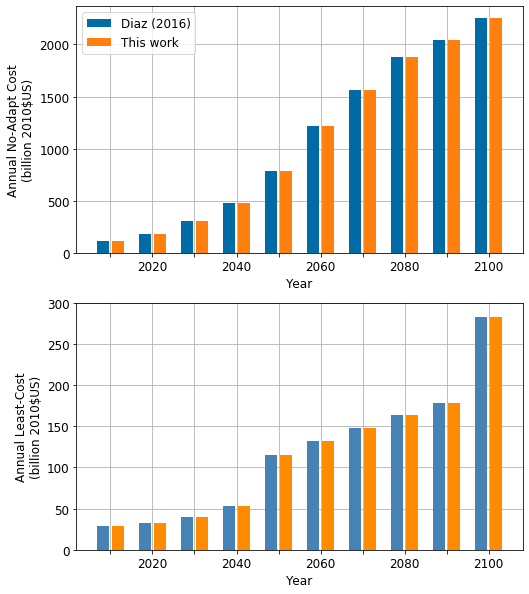

In [73]:
sep = 1.8
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.NoAdapt, width=3, color="C0", label="Diaz (2016)")
ax[0].bar(x=dfNew0.year+sep, height=dfNew0.NoAdapt, width=3, color="C1", label="This work")
ax[0].grid(); ax[0].set_axisbelow(True)
yticks = [0,500,1000,1500,2000]; ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.Optimal, width=3, color="steelblue", label="Diaz (2016)")
ax[1].bar(x=dfNew0.year+sep, height=dfNew0.Optimal, width=3, color="darkorange", label="This work")
ax[1].grid(); ax[1].set_axisbelow(True)
yticks = [0,50,100,150,200,250,300]; ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12);
#fig.savefig(plotdir+"/baseline_comparison_rcp85.pdf", bbox_inches='tight');

## Figure: total no-adaptation and optimal costs over time - version of figure with perfect foresight (matching GAMS version) and limited foresight

#### total costs only

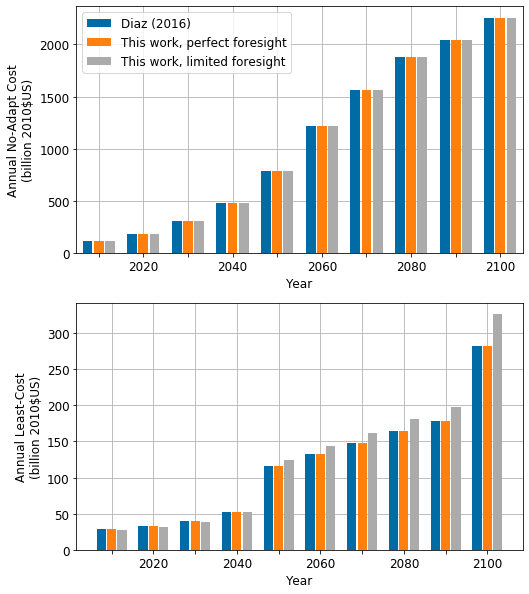

In [75]:
sep = 2.5
wid = 2.2

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.NoAdapt, width=wid, color="C0", label="Diaz (2016)")
ax[0].bar(x=dfNew0.year, height=dfNew0.NoAdapt, width=wid, color="C1", label="This work, perfect foresight")
ax[0].bar(x=dfNew1.year+sep, height=dfNew1.NoAdapt, width=wid, color="C2", label="This work, limited foresight")
ax[0].grid(); ax[0].set_axisbelow(True); ax[0].set_xlim([2005,2105])
yticks = [0,500,1000,1500,2000]; ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.Optimal, width=wid, color="C0", label="Diaz (2016)")
ax[1].bar(x=dfNew0.year, height=dfNew0.Optimal, width=wid, color="C1", label="This work")
ax[1].bar(x=dfNew1.year+sep, height=dfNew1.Optimal, width=wid, color="C2", label="This work, limited foresight")
ax[1].grid(); ax[1].set_axisbelow(True); ax[0].set_xlim([2005,2105])
yticks = [0,50,100,150,200,250,300]; ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12);
#fig.savefig(plotdir+"/baseline_comparison_rcp85.pdf", bbox_inches='tight');

## with cost breakdown

#### get optimal actions/costs for this work

Get which segments adapt which which options and to which levels. Avoid doing any loops over segments, because that will be very slow.

In [25]:
levs = {"RetreatCost" : [1,10,100,1000,10000], "ProtectCost" : [10,100,1000,10000], "NoAdaptCost" : [0]}
actions0, actions1 = {}, {}

actions0["retreat1"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="RetreatCost")&(dfO.level==1),"segments"])
actions0["retreat10"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="RetreatCost")&(dfO.level==10),"segments"])
actions0["retreat100"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="RetreatCost")&(dfO.level==100),"segments"])
actions0["retreat1000"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="RetreatCost")&(dfO.level==1000),"segments"])
actions0["retreat10000"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="RetreatCost")&(dfO.level==10000),"segments"])
actions0["protect10"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="ProtectCost")&(dfO.level==10),"segments"])
actions0["protect100"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="ProtectCost")&(dfO.level==100),"segments"])
actions0["protect1000"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="ProtectCost")&(dfO.level==1000),"segments"])
actions0["protect10000"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="ProtectCost")&(dfO.level==10000),"segments"])
actions0["noadapt"] = list(dfO.loc[(dfO.time==1)&(dfO.variable=="NoAdaptCost"),"segments"])

actions1["retreat1"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="RetreatCost")&(dfO1.level==1),"segments"])
actions1["retreat10"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="RetreatCost")&(dfO1.level==10),"segments"])
actions1["retreat100"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="RetreatCost")&(dfO1.level==100),"segments"])
actions1["retreat1000"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="RetreatCost")&(dfO1.level==1000),"segments"])
actions1["retreat10000"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="RetreatCost")&(dfO1.level==10000),"segments"])
actions1["protect10"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="ProtectCost")&(dfO1.level==10),"segments"])
actions1["protect100"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="ProtectCost")&(dfO1.level==100),"segments"])
actions1["protect1000"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="ProtectCost")&(dfO1.level==1000),"segments"])
actions1["protect10000"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="ProtectCost")&(dfO1.level==10000),"segments"])
actions1["noadapt"] = list(dfO1.loc[(dfO1.time==1)&(dfO1.variable=="NoAdaptCost"),"segments"])

In [26]:
retreat_segs0 = actions0["retreat1"]+actions0["retreat10"]+actions0["retreat100"]+actions0["retreat1000"]+actions0["retreat10000"]
protect_segs0 = actions0["protect10"]+actions0["protect100"]+actions0["protect1000"]+actions0["protect10000"]
retreat_segs1 = actions1["retreat1"]+actions1["retreat10"]+actions1["retreat100"]+actions1["retreat1000"]+actions1["retreat10000"]
protect_segs1 = actions1["protect10"]+actions1["protect100"]+actions1["protect1000"]+actions1["protect10000"]

#### get optimal actions/costs for Diaz (2016)

In [27]:
columns_we_want = ["WetlandOptimalFixed", "RelocateOptimalFixed", "StormCapitalOptimalFixed", 
                   "StormPopOptimalFixed", "ConstructOptimalFixed", "FloodOptimalFixed"]
dfGsub = dfG.loc[(dfG.variable.isin(columns_we_want))]
flood_G, wetland_G, inundation_G, retreat_G, protect_G = [0]*20, [0]*20, [0]*20, [0]*20, [0]*20
for t in range(1,21):
    retreat_G[t-1] = dfGsub.loc[(dfGsub.time==t) & (dfGsub.variable=="RelocateOptimalFixed"), "value"].sum()
    protect_G[t-1] = dfGsub.loc[(dfGsub.time==t) & (dfGsub.variable=="ConstructOptimalFixed"), "value"].sum()
    inundation_G[t-1] = dfGsub.loc[(dfGsub.time==t) & (dfGsub.variable=="FloodOptimalFixed"), "value"].sum()
    wetland_G[t-1] = dfGsub.loc[(dfGsub.time==t) & (dfGsub.variable=="WetlandOptimalFixed"), "value"].sum()
    flood_G[t-1] = dfGsub.loc[(dfGsub.time==t) & ((dfGsub.variable=="StormCapitalOptimalFixed")|(dfGsub.variable=="StormPopOptimalFixed")), "value"].sum()

In [28]:
dfDiaz["RetreatOptimal"] = retreat_G[:10]
dfDiaz["ProtectOptimal"] = protect_G[:10]
dfDiaz["InundationOptimal"] = inundation_G[:10]
dfDiaz["WetlandOptimal"] = wetland_G[:10]
dfDiaz["FloodOptimal"] = flood_G[:10]

A little funky with how the variables are named, but what Diaz (2016) refers to in Figure 2 as "flood" damages is the losses to property and lives from storms (`StormCapital` and `StormPop`), which "inundation" is the actual flooded area (`Flood`).

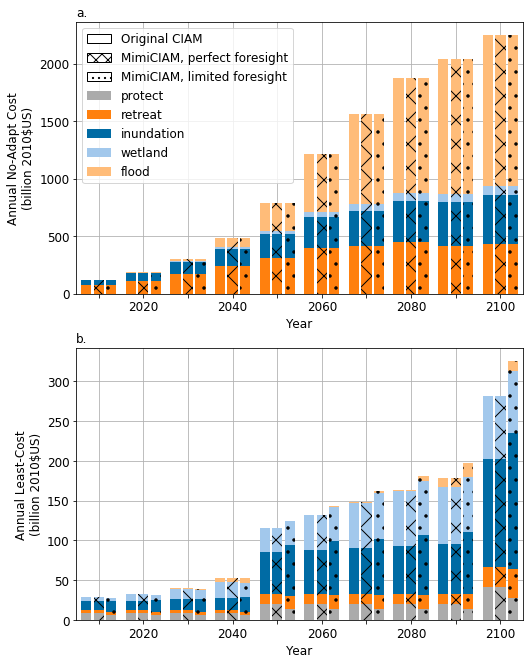

In [84]:
sep = 2.8
wid = 2.3
cost_cols = {"protect" : "C2", "retreat" : "C1", "inundation" : "C0", "wetland" : "C7", "flood" : "C8"}
hat = [1*'.', 1*'/', 1*'x']
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,11))
# PANEL A: NO ADAPTATION COSTS
pan = 0
# set up for the legend
ax[0].bar(x=dfDiaz.time-sep, height=1, width=.5, color="white", edgecolor="black", label="Original CIAM")
ax[0].bar(x=dfNew0.year, height=1, width=.5, color="white", hatch=2*hat[2], edgecolor="black", label="MimiCIAM, perfect foresight")
ax[0].bar(x=dfNew1.year, height=1, width=.5, color="white", hatch=2*hat[0], edgecolor="black", label="MimiCIAM, limited foresight")
# Diaz (2016) results
ax[0].bar(x=dfDiaz.time-sep, height=1, width=.5, color=cost_cols["protect"], label="protect")
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.RelocateNoAdapt, width=wid, color=cost_cols["retreat"], label="retreat")
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.FloodNoAdapt, bottom=dfDiaz.RelocateNoAdapt, width=wid, color=cost_cols["inundation"], label="inundation")
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.WetlandNoAdapt, bottom=dfDiaz.RelocateNoAdapt+dfDiaz.FloodNoAdapt, width=wid, color=cost_cols["wetland"], label="wetland")
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.StormCapitalNoAdapt+dfDiaz.StormPopNoAdapt, bottom=dfDiaz.RelocateNoAdapt+dfDiaz.FloodNoAdapt+dfDiaz.WetlandNoAdapt, width=wid, color=cost_cols["flood"], label="flood")
# This work, perfect foresight (match Diaz 2016)
ax[0].bar(x=dfNew0.year, height=dfNew0.RelocateNoAdapt, width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[0].bar(x=dfNew0.year, height=dfNew0.FloodNoAdapt,bottom=dfNew0.RelocateNoAdapt,
          width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[0].bar(x=dfNew0.year, height=dfNew0.WetlandNoAdapt, bottom=dfNew0.FloodNoAdapt+dfNew0.RelocateNoAdapt,
          width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[0].bar(x=dfNew0.year, height=dfNew0.StormCapitalNoAdapt+dfNew0.StormPopNoAdapt, bottom=dfNew0.RelocateNoAdapt+dfNew0.FloodNoAdapt+dfNew0.WetlandNoAdapt,
          width=wid, color=cost_cols["flood"], hatch=hat[2])
# This work, limited foresight
ax[0].bar(x=dfNew1.year+sep, height=dfNew1.RelocateNoAdapt, width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[0].bar(x=dfNew1.year+sep, height=dfNew1.FloodNoAdapt,bottom=dfNew1.RelocateNoAdapt,
          width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[0].bar(x=dfNew1.year+sep, height=dfNew1.WetlandNoAdapt, bottom=dfNew1.FloodNoAdapt+dfNew1.RelocateNoAdapt,
          width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[0].bar(x=dfNew1.year+sep, height=dfNew1.StormCapitalNoAdapt+dfNew1.StormPopNoAdapt, bottom=dfNew1.RelocateNoAdapt+dfNew1.FloodNoAdapt+dfNew1.WetlandNoAdapt,
          width=wid, color=cost_cols["flood"], hatch=hat[0])
# other plot configuration options
ax[0].grid(); ax[0].set_axisbelow(True); ax[0].set_xlim([2005,2105])
yticks = [0,500,1000,1500,2000]; ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)
ylims = ax[0].get_ylim(); top = ylims[1]*1.02; ax[0].text(2005,top, panels[pan], fontsize=12);

# PANEL B: OPTIMAL COSTS
pan += 1
# Diaz (2016) results
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.ProtectOptimal, width=wid, color=cost_cols["protect"])
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.RetreatOptimal, bottom=dfDiaz.ProtectOptimal, width=wid, color=cost_cols["retreat"])
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.InundationOptimal, bottom=dfDiaz.ProtectOptimal+dfDiaz.RetreatOptimal, width=wid, color=cost_cols["inundation"])
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.WetlandOptimal, bottom=dfDiaz.ProtectOptimal+dfDiaz.RetreatOptimal+dfDiaz.InundationOptimal, width=wid, color=cost_cols["wetland"])
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.FloodOptimal, bottom=dfDiaz.ProtectOptimal+dfDiaz.RetreatOptimal+dfDiaz.InundationOptimal+dfDiaz.WetlandOptimal, width=wid, color=cost_cols["flood"])
# This work, perfect foresight (match Diaz 2016)
ax[1].bar(x=dfNew0.year, height=dfNew0.ProtectOptimal, width=wid, color=cost_cols["protect"], hatch=hat[2])
ax[1].bar(x=dfNew0.year, height=dfNew0.RetreatOptimal, bottom=dfNew0.ProtectOptimal, width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[1].bar(x=dfNew0.year, height=dfNew0.InundationOptimal,bottom=dfNew0.ProtectOptimal+dfNew0.RetreatOptimal, width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[1].bar(x=dfNew0.year, height=dfNew0.WetlandOptimal, bottom=dfNew0.ProtectOptimal+dfNew0.RetreatOptimal+dfNew0.InundationOptimal, width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[1].bar(x=dfNew0.year, height=dfNew0.FloodOptimal, bottom=dfNew0.ProtectOptimal+dfNew0.RetreatOptimal+dfNew0.InundationOptimal+dfNew0.WetlandOptimal, width=wid, color=cost_cols["flood"], hatch=hat[2])
# This work, limited foresight
ax[1].bar(x=dfNew1.year+sep, height=dfNew1.ProtectOptimal, width=wid, color=cost_cols["protect"], hatch=hat[0])
ax[1].bar(x=dfNew1.year+sep, height=dfNew1.RetreatOptimal, bottom=dfNew1.ProtectOptimal, width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[1].bar(x=dfNew1.year+sep, height=dfNew1.InundationOptimal,bottom=dfNew1.ProtectOptimal+dfNew1.RetreatOptimal, width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[1].bar(x=dfNew1.year+sep, height=dfNew1.WetlandOptimal, bottom=dfNew1.ProtectOptimal+dfNew1.RetreatOptimal+dfNew1.InundationOptimal, width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[1].bar(x=dfNew1.year+sep, height=dfNew1.FloodOptimal, bottom=dfNew1.ProtectOptimal+dfNew1.RetreatOptimal+dfNew1.InundationOptimal+dfNew1.WetlandOptimal, width=wid, color=cost_cols["flood"], hatch=hat[0])

# other plot configuration options
ax[1].grid(); ax[1].set_axisbelow(True); ax[1].set_xlim([2005,2105])
yticks = [0,50,100,150,200,250,300]; ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12)
ylims = ax[1].get_ylim(); top = ylims[1]*1.02; ax[1].text(2005,top, panels[pan], fontsize=12);
fig.savefig(plotdir+"/baseline_comparison_breakdown_rcp85.pdf", bbox_inches='tight');


### Write an output CSV file with the plotted data

In [85]:
dfOut = pd.DataFrame(data={"year" : dfNew0.year,
                            "flood-noadapt-Diaz" : dfDiaz.StormCapitalNoAdapt+dfDiaz.StormPopNoAdapt,
                            "wetland-noadapt-Diaz" : dfDiaz.WetlandNoAdapt,
                            "inundation-noadapt-Diaz" : dfDiaz.FloodNoAdapt,
                            "retreat-noadapt-Diaz" : dfDiaz.RelocateNoAdapt,
                            "protect-noadapt-Diaz" : [0]*len(dfDiaz.RelocateNoAdapt),
                            "flood-noadapt-MimiCIAM-perfectForesight" : dfNew0.StormCapitalNoAdapt+dfNew0.StormPopNoAdapt,
                            "wetland-noadapt-MimiCIAM-perfectForesight" : dfNew0.WetlandNoAdapt,
                            "inundation-noadapt-MimiCIAM-perfectForesight" : dfNew0.FloodNoAdapt,
                            "retreat-noadapt-MimiCIAM-perfectForesight" : dfNew0.RelocateNoAdapt,
                            "protect-noadapt-MimiCIAM-perfectForesight" : [0]*len(dfNew0.RelocateNoAdapt),
                            "flood-noadapt-MimiCIAM-limitedForesight" : dfNew1.StormCapitalNoAdapt+dfNew1.StormPopNoAdapt,
                            "wetland-noadapt-MimiCIAM-limitedForesight" : dfNew1.WetlandNoAdapt,
                            "inundation-noadapt-MimiCIAM-limitedForesight" : dfNew1.FloodNoAdapt,
                            "retreat-noadapt-MimiCIAM-limitedForesight" : dfNew1.RelocateNoAdapt,
                            "protect-noadapt-MimiCIAM-limitedForesight" : [0]*len(dfNew1.RelocateNoAdapt),
                            "flood-leastcost-Diaz" : dfDiaz.FloodOptimal, 
                            "wetland-leastcost-Diaz" : dfDiaz.WetlandOptimal,
                            "inundation-leastcost-Diaz" : dfDiaz.FloodOptimal,
                            "retreat-leastcost-Diaz" : dfDiaz.RetreatOptimal,
                            "protect-leastcost-Diaz" : dfDiaz.ProtectOptimal,
                            "flood-leastcost-MimiCIAM-perfectForesight" : dfNew0.FloodOptimal,
                            "wetland-leastcost-MimiCIAM-perfectForesight" : dfNew0.WetlandOptimal,
                            "inundation-leastcost-MimiCIAM-perfectForesight" : dfNew0.FloodOptimal,
                            "retreat-leastcost-MimiCIAM-perfectForesight" : dfNew0.RetreatOptimal,
                            "protect-leastcost-MimiCIAM-perfectForesight" : dfNew0.ProtectOptimal,
                            "flood-leastcost-MimiCIAM-limitedForesight" : dfNew1.FloodOptimal,
                            "wetland-leastcost-MimiCIAM-limitedForesight" : dfNew1.WetlandOptimal,
                            "inundation-leastcost-MimiCIAM-limitedForesight" : dfNew1.FloodOptimal,
                            "retreat-leastcost-MimiCIAM-limitedForesight" : dfNew1.RetreatOptimal,
                            "protect-leastcost-MimiCIAM-limitedForesight" : dfNew1.ProtectOptimal})
filename_out = dir_julia + "/FigureData_baseline_comparisons.csv"
dfOut.to_csv(filename_out, index=False)

## baseline

construct fix, limited foresight

In [87]:
dfO = pd.read_csv(dir_julia + "/ctrl_seg_85p50ssp0fixed_optimal.csv")
dfN = pd.read_csv(dir_julia + "/ctrl_seg_85p50ssp0fixed.csv")
dfC = pd.read_csv(dir_julia + "/ctrl_global_85p50ssp0fixed.csv")
df_ctrl = process_costs_df(dfC=dfC, dfO=dfO, dfN=dfN, tmax=10)

## baseline+updated SLR

construct fix, limited foresight, BRICK RCP8.5

In [88]:
dfO = pd.read_csv(dir_julia + "/ctrl+BRICKLSL85_seg_85p50ssp0fixed_optimal.csv")
dfN = pd.read_csv(dir_julia + "/ctrl+BRICKLSL85_seg_85p50ssp0fixed.csv")
dfC = pd.read_csv(dir_julia + "/ctrl+BRICKLSL85_global_85p50ssp0fixed.csv")
df_BRICK85 = process_costs_df(dfC=dfC, dfO=dfO, dfN=dfN, tmax=10)

## baseline+updated GDP/population via SSP5

In [89]:
dfO = pd.read_csv(dir_julia + "/ctrl+SSP5_seg_85p50ssp5fixed_optimal.csv")
dfN = pd.read_csv(dir_julia + "/ctrl+SSP5_seg_85p50ssp5fixed.csv")
dfC = pd.read_csv(dir_julia + "/ctrl+SSP5_global_85p50ssp5fixed.csv")
df_SSP5 = process_costs_df(dfC=dfC, dfO=dfO, dfN=dfN, tmax=10)

## baseline+updated SLR+updated GPD/population via SSP5

In [90]:
dfO = pd.read_csv(dir_julia + "/ctrl+SSP5+BRICKLSL85_seg_85p50ssp5fixed_optimal.csv")
dfN = pd.read_csv(dir_julia + "/ctrl+SSP5+BRICKLSL85_seg_85p50ssp5fixed.csv")
dfC = pd.read_csv(dir_julia + "/ctrl+SSP5+BRICKLSL85_global_85p50ssp5fixed.csv")
df_SSP5_BRICK85 = process_costs_df(dfC=dfC, dfO=dfO, dfN=dfN, tmax=10)

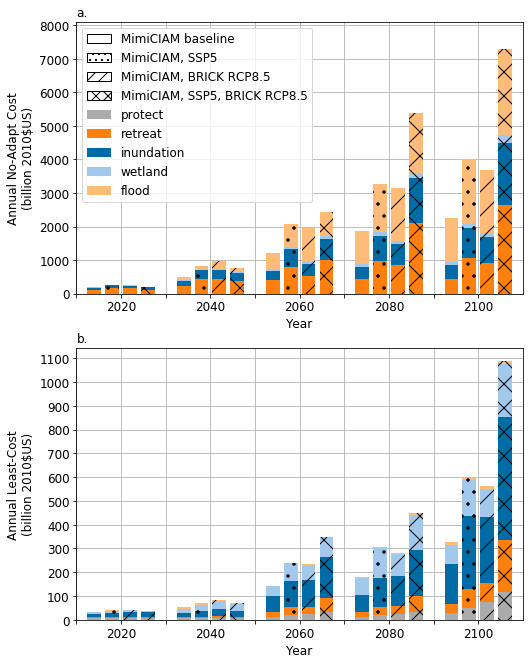

In [91]:
sep = 2
wid = 3.1
cost_cols = {"protect" : "C2", "retreat" : "C1", "inundation" : "C0", "wetland" : "C7", "flood" : "C8"}
times_plot = list(range(2010,2110,10))
idx_plot = [1,3,5,7,9]
times_plot = np.array([times_plot[k] for k in idx_plot])
hat = [1*'.', 1*'/', 1*'x']
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,11))
# PANEL A: NO ADAPTATION COSTS
pan = 0
# set up for the legend
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", edgecolor="black", label="MimiCIAM baseline")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[0], edgecolor="black", label="MimiCIAM, SSP5")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[1], edgecolor="black", label="MimiCIAM, BRICK RCP8.5")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[2], edgecolor="black", label="MimiCIAM, SSP5, BRICK RCP8.5")
# ctrl
ax[0].bar(x=times_plot-3*sep, height=1, width=.5, color=cost_cols["protect"], label="protect")
ax[0].bar(x=times_plot-3*sep, height=df_ctrl.RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], label="retreat")
ax[0].bar(x=times_plot-3*sep, height=df_ctrl.FloodNoAdapt[idx_plot], bottom=np.array(df_ctrl.RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[0].bar(x=times_plot-3*sep, height=df_ctrl.WetlandNoAdapt[idx_plot], bottom=np.array(df_ctrl.RelocateNoAdapt[idx_plot]+df_ctrl.FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[0].bar(x=times_plot-3*sep, height=df_ctrl.StormCapitalNoAdapt[idx_plot]+df_ctrl.StormPopNoAdapt[idx_plot], bottom=np.array(df_ctrl.RelocateNoAdapt[idx_plot]+df_ctrl.FloodNoAdapt[idx_plot]+df_ctrl.WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# SSP5 pop & GDP
ax[0].bar(x=times_plot-sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=df_SSP5.RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=df_SSP5.FloodNoAdapt[idx_plot], bottom=np.array(df_SSP5.RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=df_SSP5.WetlandNoAdapt[idx_plot], bottom=np.array(df_SSP5.RelocateNoAdapt[idx_plot]+df_SSP5.FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=df_SSP5.StormCapitalNoAdapt[idx_plot]+df_SSP5.StormPopNoAdapt[idx_plot], bottom=np.array(df_SSP5.RelocateNoAdapt[idx_plot]+df_SSP5.FloodNoAdapt[idx_plot]+df_SSP5.WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[0])
# BRICK SLR RCP8.5
ax[0].bar(x=times_plot+sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=df_BRICK85.RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=df_BRICK85.FloodNoAdapt[idx_plot], bottom=np.array(df_BRICK85.RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=df_BRICK85.WetlandNoAdapt[idx_plot], bottom=np.array(df_BRICK85.RelocateNoAdapt[idx_plot]+df_BRICK85.FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=df_BRICK85.StormCapitalNoAdapt[idx_plot]+df_BRICK85.StormPopNoAdapt[idx_plot], bottom=np.array(df_BRICK85.RelocateNoAdapt[idx_plot]+df_BRICK85.FloodNoAdapt[idx_plot]+df_BRICK85.WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[1])
# BRICK SLR RCP8.5 & SSP5 pop/GDP
ax[0].bar(x=times_plot+3*sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.FloodNoAdapt[idx_plot], bottom=np.array(df_SSP5_BRICK85.RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.WetlandNoAdapt[idx_plot], bottom=np.array(df_SSP5_BRICK85.RelocateNoAdapt[idx_plot]+df_SSP5_BRICK85.FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.StormCapitalNoAdapt[idx_plot]+df_SSP5_BRICK85.StormPopNoAdapt[idx_plot], bottom=np.array(df_SSP5_BRICK85.RelocateNoAdapt[idx_plot]+df_SSP5_BRICK85.FloodNoAdapt[idx_plot]+df_SSP5_BRICK85.WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2])
# other plot configuration options
ax[0].grid(); ax[0].set_axisbelow(True); ax[0].set_xlim([2010,2110]); ax[0].set_ylim([0,8100])
yticks = list(range(0,8100,1000)); ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)
ylims = ax[0].get_ylim(); top = ylims[1]*1.02; ax[0].text(2010,top, panels[pan], fontsize=12);

# PANEL B: OPTIMAL COSTS
pan += 1
# ctrl
ax[1].bar(x=times_plot-3*sep, height=df_ctrl.ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], label="protect")
ax[1].bar(x=times_plot-3*sep, height=df_ctrl.RetreatOptimal[idx_plot], bottom=np.array(df_ctrl.ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], label="retreat")
ax[1].bar(x=times_plot-3*sep, height=df_ctrl.InundationOptimal[idx_plot], bottom=np.array(df_ctrl.ProtectOptimal[idx_plot]+df_ctrl.RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[1].bar(x=times_plot-3*sep, height=df_ctrl.WetlandOptimal[idx_plot], bottom=np.array(df_ctrl.ProtectOptimal[idx_plot]+df_ctrl.RetreatOptimal[idx_plot]+df_ctrl.InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[1].bar(x=times_plot-3*sep, height=df_ctrl.FloodOptimal[idx_plot], bottom=np.array(df_ctrl.ProtectOptimal[idx_plot]+df_ctrl.RetreatOptimal[idx_plot]+df_ctrl.InundationOptimal[idx_plot]+df_ctrl.WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# SSP5 pop & GDP
ax[1].bar(x=times_plot-sep, height=df_SSP5.ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=df_SSP5.RetreatOptimal[idx_plot], bottom=np.array(df_SSP5.ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=df_SSP5.InundationOptimal[idx_plot], bottom=np.array(df_SSP5.ProtectOptimal[idx_plot]+df_SSP5.RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=df_SSP5.WetlandOptimal[idx_plot], bottom=np.array(df_SSP5.ProtectOptimal[idx_plot]+df_SSP5.RetreatOptimal[idx_plot]+df_SSP5.InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=df_SSP5.FloodOptimal[idx_plot], bottom=np.array(df_SSP5.ProtectOptimal[idx_plot]+df_SSP5.RetreatOptimal[idx_plot]+df_SSP5.InundationOptimal[idx_plot]+df_SSP5.WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[0])
# BRICK SLR RCP8.5
ax[1].bar(x=times_plot+sep, height=df_BRICK85.ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=df_BRICK85.RetreatOptimal[idx_plot], bottom=np.array(df_BRICK85.ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=df_BRICK85.InundationOptimal[idx_plot], bottom=np.array(df_BRICK85.ProtectOptimal[idx_plot]+df_BRICK85.RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=df_BRICK85.WetlandOptimal[idx_plot], bottom=np.array(df_BRICK85.ProtectOptimal[idx_plot]+df_BRICK85.RetreatOptimal[idx_plot]+df_BRICK85.InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=df_BRICK85.FloodOptimal[idx_plot], bottom=np.array(df_BRICK85.ProtectOptimal[idx_plot]+df_BRICK85.RetreatOptimal[idx_plot]+df_BRICK85.InundationOptimal[idx_plot]+df_BRICK85.WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[1])
# BRICK SLR RCP8.5 & SSP5 pop/GDP
ax[1].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.RetreatOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.InundationOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]+df_SSP5_BRICK85.RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.WetlandOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]+df_SSP5_BRICK85.RetreatOptimal[idx_plot]+df_SSP5_BRICK85.InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=df_SSP5_BRICK85.FloodOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]+df_SSP5_BRICK85.RetreatOptimal[idx_plot]+df_SSP5_BRICK85.InundationOptimal[idx_plot]+df_SSP5_BRICK85.WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2]) 
# other plot configuration options
ax[1].grid(); ax[1].set_axisbelow(True); ax[1].set_xlim([2010,2110])
yticks = list(range(0,1200,100)); ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12)
ylims = ax[1].get_ylim(); top = ylims[1]*1.02; ax[1].text(2010,top, panels[pan], fontsize=12);
fig.savefig(plotdir+"/updates_comparison_rcp85.pdf", bbox_inches='tight')

### Write an output CSV file with the plotted data

In [92]:
dfOut = pd.DataFrame(data={"year" : dfNew0.year,
                            "flood-noadapt-MimiCIAM-ctrl" : df_ctrl.StormCapitalNoAdapt+df_ctrl.StormPopNoAdapt,
                            "wetland-noadapt-MimiCIAM-ctrl" : df_ctrl.WetlandNoAdapt,
                            "inundation-noadapt-MimiCIAM-ctrl" : df_ctrl.FloodNoAdapt,
                            "retreat-noadapt-MimiCIAM-ctrl" : df_ctrl.RelocateNoAdapt,
                            "protect-noadapt-MimiCIAM-ctrl" : [0]*len(df_ctrl.RelocateNoAdapt),
                            "flood-noadapt-MimiCIAM-SSP5" : df_SSP5.StormCapitalNoAdapt+df_SSP5.StormPopNoAdapt,
                            "wetland-noadapt-MimiCIAM-SSP5" : df_SSP5.WetlandNoAdapt,
                            "inundation-noadapt-MimiCIAM-SSP5" : df_SSP5.FloodNoAdapt,
                            "retreat-noadapt-MimiCIAM-SSP5" : df_SSP5.RelocateNoAdapt,
                            "protect-noadapt-MimiCIAM-SSP5" : [0]*len(df_SSP5.RelocateNoAdapt),
                            "flood-noadapt-MimiCIAM-BRICKRCP85" : df_BRICK85.StormCapitalNoAdapt+df_BRICK85.StormPopNoAdapt,
                            "wetland-noadapt-MimiCIAM-BRICKRCP85" : df_BRICK85.WetlandNoAdapt,
                            "inundation-noadapt-MimiCIAM-BRICKRCP85" : df_BRICK85.FloodNoAdapt,
                            "retreat-noadapt-MimiCIAM-BRICKRCP85" : df_BRICK85.RelocateNoAdapt,
                            "protect-noadapt-MimiCIAM-BRICKRCP85" : [0]*len(df_BRICK85.RelocateNoAdapt),
                            "flood-noadapt-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.StormCapitalNoAdapt+df_SSP5_BRICK85.StormPopNoAdapt,
                            "wetland-noadapt-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.WetlandNoAdapt,
                            "inundation-noadapt-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.FloodNoAdapt,
                            "retreat-noadapt-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.RelocateNoAdapt,
                            "protect-noadapt-MimiCIAM-SSP5-BRICKRCP85" : [0]*len(df_SSP5_BRICK85.RelocateNoAdapt),
                            "flood-leastcost-MimiCIAM-ctrl" : df_ctrl.FloodOptimal,
                            "wetland-leastcost-MimiCIAM-ctrl" : df_ctrl.WetlandOptimal,
                            "inundation-leastcost-MimiCIAM-ctrl" : df_ctrl.FloodOptimal,
                            "retreat-leastcost-MimiCIAM-ctrl" : df_ctrl.RetreatOptimal,
                            "protect-leastcost-MimiCIAM-ctrl" : df_ctrl.ProtectOptimal,
                            "flood-leastcost-MimiCIAM-SSP5" : df_SSP5.FloodOptimal,
                            "wetland-leastcost-MimiCIAM-SSP5" : df_SSP5.WetlandOptimal,
                            "inundation-leastcost-MimiCIAM-SSP5" : df_SSP5.FloodOptimal,
                            "retreat-leastcost-MimiCIAM-SSP5" : df_SSP5.RetreatOptimal,
                            "protect-leastcost-MimiCIAM-SSP5" : df_SSP5.ProtectOptimal,
                            "flood-leastcost-MimiCIAM-BRICKRCP85" : df_BRICK85.FloodOptimal,
                            "wetland-leastcost-MimiCIAM-BRICKRCP85" : df_BRICK85.WetlandOptimal,
                            "inundation-leastcost-MimiCIAM-BRICKRCP85" : df_BRICK85.FloodOptimal,
                            "retreat-leastcost-MimiCIAM-BRICKRCP85" : df_BRICK85.RetreatOptimal,
                            "protect-leastcost-MimiCIAM-BRICKRCP85" : df_BRICK85.ProtectOptimal,
                            "flood-leastcost-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.FloodOptimal,
                            "wetland-leastcost-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.WetlandOptimal,
                            "inundation-leastcost-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.FloodOptimal,
                            "retreat-leastcost-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.RetreatOptimal,
                            "protect-leastcost-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.ProtectOptimal})
filename_out = dir_julia + "/FigureData_updates_comparisons_SSP5-RCP85.csv"
dfOut.to_csv(filename_out, index=False)

# Figure: comparison of damages and breakdown across SSPs with the new standard model version

## baseline+updated SLR+updated GPD/population via SSP1-26, SSP2-45, SSP4-60, SSP5-85

In [93]:
scenarios = [(1,26),(2,45),(4,60),(5,85)]
surgeoption = 0

In [94]:
dfOs = {scen : None for scen in scenarios}
dfNs = {scen : None for scen in scenarios}
dfCs = {scen : None for scen in scenarios}
dfs  = {scen : None for scen in scenarios}

for scen in scenarios:
    ssp,rcp = scen
    dfOs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_seg_85p50ssp"+str(ssp)+"fixed_optimal.csv")
    dfNs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_seg_85p50ssp"+str(ssp)+"fixed.csv")
    dfCs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_global_85p50ssp"+str(ssp)+"fixed.csv")
    dfs[scen]  = process_costs_df(dfC=dfCs[scen], dfO=dfOs[scen], dfN=dfNs[scen], tmax=10)


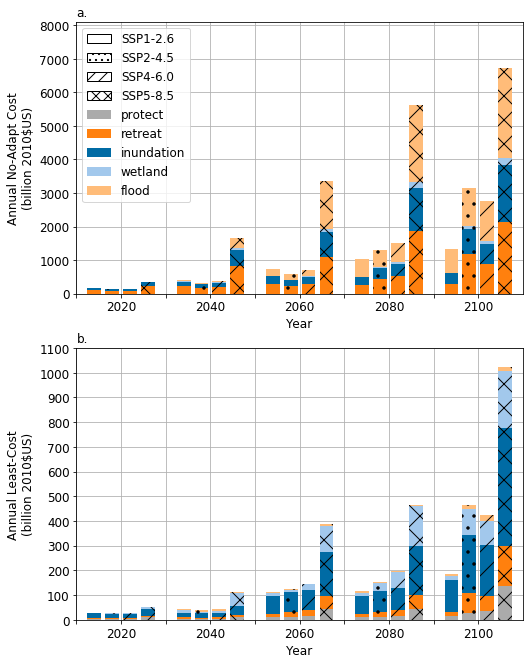

In [96]:
sep = 2
wid = 3.1
cost_cols = {"protect" : "C2", "retreat" : "C1", "inundation" : "C0", "wetland" : "C7", "flood" : "C8"}
times_plot = list(range(2010,2110,10))
idx_plot = [1,3,5,7,9]
times_plot = np.array([times_plot[k] for k in idx_plot])
hat = [1*'.', 1*'/', 1*'x']
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,11))
# PANEL A: NO ADAPTATION COSTS
pan = 0
# set up for the legend
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", edgecolor="black", label="SSP1-2.6")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[0], edgecolor="black", label="SSP2-4.5")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[1], edgecolor="black", label="SSP4-6.0")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[2], edgecolor="black", label="SSP5-8.5")
# SSP1-RCP2.6
scen = (1,26)
ax[0].bar(x=times_plot-3*sep, height=1, width=.5, color=cost_cols["protect"], label="protect")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], label="retreat")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# SSP2-RCP4.5
scen = (2,45)
ax[0].bar(x=times_plot-sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[0])
# SSP4-RCP6.0
scen = (4,60)
ax[0].bar(x=times_plot+sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[1])
# SSP5-RCP8.5
scen = (5,85)
ax[0].bar(x=times_plot+3*sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2])
# other plot configuration options
ax[0].grid(); ax[0].set_axisbelow(True); ax[0].set_xlim([2010,2110]); ax[0].set_ylim([0,8100])
yticks = list(range(0,8100,1000)); ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)
ylims = ax[0].get_ylim(); top = ylims[1]*1.02; ax[0].text(2010,top, panels[pan], fontsize=12);

# PANEL B: OPTIMAL COSTS
pan += 1
# SSP1-RCP2.6
scen = (1,26)
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], label="protect")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], label="retreat")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# SSP2-RCP4.5
scen = (2,45)
ax[1].bar(x=times_plot-sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[0])
# SSP4-RCP6.0
scen = (4,60)
ax[1].bar(x=times_plot+sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[1])
# SSP5-RCP8.5
scen = (5,85)
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2]) 
# other plot configuration options
ax[1].grid(); ax[1].set_axisbelow(True); ax[1].set_xlim([2010,2110])
yticks = list(range(0,1200,100)); ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12)
ylims = ax[1].get_ylim(); top = ylims[1]*1.02; ax[1].text(2010,top, panels[pan], fontsize=12);
fig.savefig(plotdir+"/baseline_comparison_ssprcp.pdf", bbox_inches='tight')


### Write an output CSV file with the plotted data

In [97]:
dfOut = pd.DataFrame(data={"year" : dfNew0.year,
                            "flood-noadapt-SSP1-RCP26" : dfs[(1,26)].StormCapitalNoAdapt+dfs[(1,26)].StormPopNoAdapt,
                            "wetland-noadapt-SSP1-RCP26" : dfs[(1,26)].WetlandNoAdapt,
                            "inundation-noadapt-SSP1-RCP26" : dfs[(1,26)].FloodNoAdapt,
                            "retreat-noadapt-SSP1-RCP26" : dfs[(1,26)].RelocateNoAdapt,
                            "protect-noadapt-SSP1-RCP26" : [0]*len(dfs[(1,26)].RelocateNoAdapt),
                            "flood-noadapt-SSP2-RCP45" : dfs[(2,45)].StormCapitalNoAdapt+dfs[(2,45)].StormPopNoAdapt,
                            "wetland-noadapt-SSP2-RCP45" : dfs[(2,45)].WetlandNoAdapt,
                            "inundation-noadapt-SSP2-RCP45" : dfs[(2,45)].FloodNoAdapt,
                            "retreat-noadapt-SSP2-RCP45" : dfs[(2,45)].RelocateNoAdapt,
                            "protect-noadapt-SSP2-RCP45" : [0]*len(dfs[(2,45)].RelocateNoAdapt),
                            "flood-noadapt-SSP4-RCP60" : dfs[(4,60)].StormCapitalNoAdapt+dfs[(4,60)].StormPopNoAdapt,
                            "wetland-noadapt-SSP4-RCP60" : dfs[(4,60)].WetlandNoAdapt,
                            "inundation-noadapt-SSP4-RCP60" : dfs[(4,60)].FloodNoAdapt,
                            "retreat-noadapt-SSP4-RCP60" : dfs[(4,60)].RelocateNoAdapt,
                            "protect-noadapt-SSP4-RCP60" : [0]*len(dfs[(4,60)].RelocateNoAdapt),
                            "flood-noadapt-SSP5-RCP85" : dfs[(5,85)].StormCapitalNoAdapt+dfs[(5,85)].StormPopNoAdapt,
                            "wetland-noadapt-SSP5-RCP85" : dfs[(5,85)].WetlandNoAdapt,
                            "inundation-noadapt-SSP5-RCP85" : dfs[(5,85)].FloodNoAdapt,
                            "retreat-noadapt-SSP5-RCP85" : dfs[(5,85)].RelocateNoAdapt,
                            "protect-noadapt-SSP5-RCP85" : [0]*len(dfs[(5,85)].RelocateNoAdapt),
                            "flood-leastcost-SSP1-RCP26" : dfs[(1,26)].FloodOptimal,
                            "wetland-leastcost-SSP1-RCP26" : dfs[(1,26)].WetlandOptimal,
                            "inundation-leastcost-SSP1-RCP26" : dfs[(1,26)].FloodOptimal,
                            "retreat-leastcost-SSP1-RCP26" : dfs[(1,26)].RetreatOptimal,
                            "protect-leastcost-SSP1-RCP26" : dfs[(1,26)].ProtectOptimal,
                            "flood-leastcost-SSP2-RCP45" : dfs[(2,45)].FloodOptimal,
                            "wetland-leastcost-SSP2-RCP45" : dfs[(2,45)].WetlandOptimal,
                            "inundation-leastcost-SSP2-RCP45" : dfs[(2,45)].FloodOptimal,
                            "retreat-leastcost-SSP2-RCP45" : dfs[(2,45)].RetreatOptimal,
                            "protect-leastcost-SSP2-RCP45" : dfs[(2,45)].ProtectOptimal,
                            "flood-leastcost-SSP4-RCP60" : dfs[(4,60)].FloodOptimal,
                            "wetland-leastcost-SSP4-RCP60" : dfs[(4,60)].WetlandOptimal,
                            "inundation-leastcost-SSP4-RCP60" : dfs[(4,60)].FloodOptimal,
                            "retreat-leastcost-SSP4-RCP60" : dfs[(4,60)].RetreatOptimal,
                            "protect-leastcost-SSP4-RCP60" : dfs[(4,60)].ProtectOptimal,
                            "flood-leastcost-SSP5-RCP85" : dfs[(5,85)].FloodOptimal,
                            "wetland-leastcost-SSP5-RCP85" : dfs[(5,85)].WetlandOptimal,
                            "inundation-leastcost-SSP5-RCP85" : dfs[(5,85)].FloodOptimal,
                            "retreat-leastcost-SSP5-RCP85" : dfs[(5,85)].RetreatOptimal,
                            "protect-leastcost-SSP5-RCP85" : dfs[(5,85)].ProtectOptimal})
filename_out = dir_julia + "/FigureData_baseline_comparison_ssprcp.csv"
dfOut.to_csv(filename_out, index=False)

### Supplemental experiment: surgeoption=1

In [46]:
scenarios = [(1,26),(2,45),(4,60),(5,85)]
surgeoption = 1

In [47]:
dfOs = {scen : None for scen in scenarios}
dfNs = {scen : None for scen in scenarios}
dfCs = {scen : None for scen in scenarios}
dfs  = {scen : None for scen in scenarios}

for scen in scenarios:
    ssp,rcp = scen
    dfOs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_seg_85p50ssp"+str(ssp)+"fixed_optimal.csv")
    dfNs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_seg_85p50ssp"+str(ssp)+"fixed.csv")
    dfCs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_global_85p50ssp"+str(ssp)+"fixed.csv")
    dfs[scen]  = process_costs_df(dfC=dfCs[scen], dfO=dfOs[scen], dfN=dfNs[scen], tmax=10)


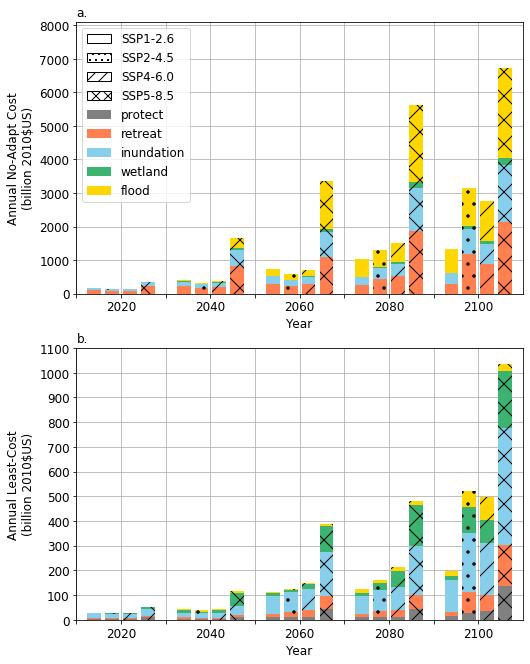

In [41]:
sep = 2
wid = 3.1
cost_cols = {"protect" : "C2", "retreat" : "C1", "inundation" : "C0", "wetland" : "C7", "flood" : "C8"}
times_plot = list(range(2010,2110,10))
idx_plot = [1,3,5,7,9]
times_plot = np.array([times_plot[k] for k in idx_plot])
hat = [1*'.', 1*'/', 1*'x']
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,11))
# PANEL A: NO ADAPTATION COSTS
pan = 0
# set up for the legend
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", edgecolor="black", label="SSP1-2.6")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[0], edgecolor="black", label="SSP2-4.5")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[1], edgecolor="black", label="SSP4-6.0")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[2], edgecolor="black", label="SSP5-8.5")
# SSP1-RCP2.6
scen = (1,26)
ax[0].bar(x=times_plot-3*sep, height=1, width=.5, color=cost_cols["protect"], label="protect")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], label="retreat")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# SSP2-RCP4.5
scen = (2,45)
ax[0].bar(x=times_plot-sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[0])
# SSP4-RCP6.0
scen = (4,60)
ax[0].bar(x=times_plot+sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[1])
# SSP5-RCP8.5
scen = (5,85)
ax[0].bar(x=times_plot+3*sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2])
# other plot configuration options
ax[0].grid(); ax[0].set_axisbelow(True); ax[0].set_xlim([2010,2110]); ax[0].set_ylim([0,8100])
yticks = list(range(0,8100,1000)); ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)
ylims = ax[0].get_ylim(); top = ylims[1]*1.02; ax[0].text(2010,top, panels[pan], fontsize=12);

# PANEL B: OPTIMAL COSTS
pan += 1
# SSP1-RCP2.6
scen = (1,26)
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], label="protect")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], label="retreat")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# SSP2-RCP4.5
scen = (2,45)
ax[1].bar(x=times_plot-sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[0])
# SSP4-RCP6.0
scen = (4,60)
ax[1].bar(x=times_plot+sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[1])
# SSP5-RCP8.5
scen = (5,85)
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2]) 
# other plot configuration options
ax[1].grid(); ax[1].set_axisbelow(True); ax[1].set_xlim([2010,2110])
yticks = list(range(0,1200,100)); ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12)
ylims = ax[1].get_ylim(); top = ylims[1]*1.02; ax[1].text(2010,top, panels[pan], fontsize=12);
fig.savefig(plotdir+"/baseline_comparison_ssprcp_surge1.pdf", bbox_inches='tight')


In [48]:
dfOut = pd.DataFrame(data={"year" : dfNew0.year,
                            "flood-noadapt-SSP1-RCP26" : dfs[(1,26)].StormCapitalNoAdapt+dfs[(1,26)].StormPopNoAdapt,
                            "wetland-noadapt-SSP1-RCP26" : dfs[(1,26)].WetlandNoAdapt,
                            "inundation-noadapt-SSP1-RCP26" : dfs[(1,26)].FloodNoAdapt,
                            "retreat-noadapt-SSP1-RCP26" : dfs[(1,26)].RelocateNoAdapt,
                            "protect-noadapt-SSP1-RCP26" : [0]*len(dfs[(1,26)].RelocateNoAdapt),
                            "flood-noadapt-SSP2-RCP45" : dfs[(2,45)].StormCapitalNoAdapt+dfs[(2,45)].StormPopNoAdapt,
                            "wetland-noadapt-SSP2-RCP45" : dfs[(2,45)].WetlandNoAdapt,
                            "inundation-noadapt-SSP2-RCP45" : dfs[(2,45)].FloodNoAdapt,
                            "retreat-noadapt-SSP2-RCP45" : dfs[(2,45)].RelocateNoAdapt,
                            "protect-noadapt-SSP2-RCP45" : [0]*len(dfs[(2,45)].RelocateNoAdapt),
                            "flood-noadapt-SSP4-RCP60" : dfs[(4,60)].StormCapitalNoAdapt+dfs[(4,60)].StormPopNoAdapt,
                            "wetland-noadapt-SSP4-RCP60" : dfs[(4,60)].WetlandNoAdapt,
                            "inundation-noadapt-SSP4-RCP60" : dfs[(4,60)].FloodNoAdapt,
                            "retreat-noadapt-SSP4-RCP60" : dfs[(4,60)].RelocateNoAdapt,
                            "protect-noadapt-SSP4-RCP60" : [0]*len(dfs[(4,60)].RelocateNoAdapt),
                            "flood-noadapt-SSP5-RCP85" : dfs[(5,85)].StormCapitalNoAdapt+dfs[(5,85)].StormPopNoAdapt,
                            "wetland-noadapt-SSP5-RCP85" : dfs[(5,85)].WetlandNoAdapt,
                            "inundation-noadapt-SSP5-RCP85" : dfs[(5,85)].FloodNoAdapt,
                            "retreat-noadapt-SSP5-RCP85" : dfs[(5,85)].RelocateNoAdapt,
                            "protect-noadapt-SSP5-RCP85" : [0]*len(dfs[(5,85)].RelocateNoAdapt),
                            "flood-leastcost-SSP1-RCP26" : dfs[(1,26)].FloodOptimal,
                            "wetland-leastcost-SSP1-RCP26" : dfs[(1,26)].WetlandOptimal,
                            "inundation-leastcost-SSP1-RCP26" : dfs[(1,26)].FloodOptimal,
                            "retreat-leastcost-SSP1-RCP26" : dfs[(1,26)].RetreatOptimal,
                            "protect-leastcost-SSP1-RCP26" : dfs[(1,26)].ProtectOptimal,
                            "flood-leastcost-SSP2-RCP45" : dfs[(2,45)].FloodOptimal,
                            "wetland-leastcost-SSP2-RCP45" : dfs[(2,45)].WetlandOptimal,
                            "inundation-leastcost-SSP2-RCP45" : dfs[(2,45)].FloodOptimal,
                            "retreat-leastcost-SSP2-RCP45" : dfs[(2,45)].RetreatOptimal,
                            "protect-leastcost-SSP2-RCP45" : dfs[(2,45)].ProtectOptimal,
                            "flood-leastcost-SSP4-RCP60" : dfs[(4,60)].FloodOptimal,
                            "wetland-leastcost-SSP4-RCP60" : dfs[(4,60)].WetlandOptimal,
                            "inundation-leastcost-SSP4-RCP60" : dfs[(4,60)].FloodOptimal,
                            "retreat-leastcost-SSP4-RCP60" : dfs[(4,60)].RetreatOptimal,
                            "protect-leastcost-SSP4-RCP60" : dfs[(4,60)].ProtectOptimal,
                            "flood-leastcost-SSP5-RCP85" : dfs[(5,85)].FloodOptimal,
                            "wetland-leastcost-SSP5-RCP85" : dfs[(5,85)].WetlandOptimal,
                            "inundation-leastcost-SSP5-RCP85" : dfs[(5,85)].FloodOptimal,
                            "retreat-leastcost-SSP5-RCP85" : dfs[(5,85)].RetreatOptimal,
                            "protect-leastcost-SSP5-RCP85" : dfs[(5,85)].ProtectOptimal})
filename_out = dir_julia + "/FigureData_baseline_comparison_ssprcp_surge1.csv"
dfOut.to_csv(filename_out, index=False)

### Supplemental experiment: surgeoption=2

In [49]:
scenarios = [(1,26),(2,45),(4,60),(5,85)]
surgeoption = 2

In [50]:
dfOs = {scen : None for scen in scenarios}
dfNs = {scen : None for scen in scenarios}
dfCs = {scen : None for scen in scenarios}
dfs  = {scen : None for scen in scenarios}

for scen in scenarios:
    ssp,rcp = scen
    dfOs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_seg_85p50ssp"+str(ssp)+"fixed_optimal.csv")
    dfNs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_seg_85p50ssp"+str(ssp)+"fixed.csv")
    dfCs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_global_85p50ssp"+str(ssp)+"fixed.csv")
    dfs[scen]  = process_costs_df(dfC=dfCs[scen], dfO=dfOs[scen], dfN=dfNs[scen], tmax=10)


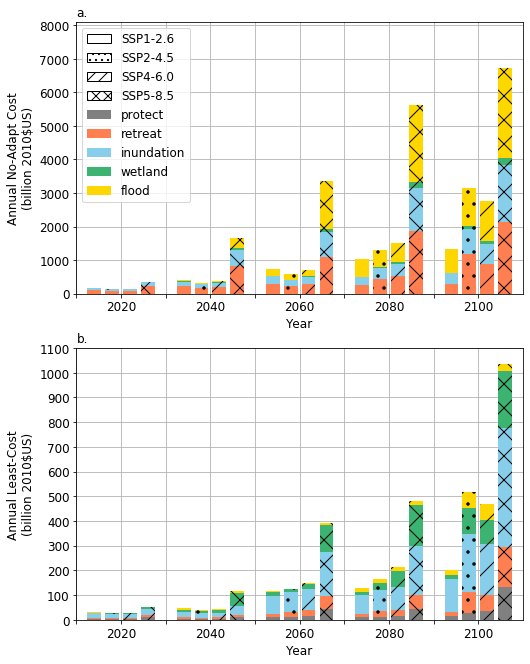

In [44]:
sep = 2
wid = 3.1
cost_cols = {"protect" : "C2", "retreat" : "C1", "inundation" : "C0", "wetland" : "C7", "flood" : "C8"}
times_plot = list(range(2010,2110,10))
idx_plot = [1,3,5,7,9]
times_plot = np.array([times_plot[k] for k in idx_plot])
hat = [1*'.', 1*'/', 1*'x']
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,11))
# PANEL A: NO ADAPTATION COSTS
pan = 0
# set up for the legend
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", edgecolor="black", label="SSP1-2.6")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[0], edgecolor="black", label="SSP2-4.5")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[1], edgecolor="black", label="SSP4-6.0")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[2], edgecolor="black", label="SSP5-8.5")
# SSP1-RCP2.6
scen = (1,26)
ax[0].bar(x=times_plot-3*sep, height=1, width=.5, color=cost_cols["protect"], label="protect")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], label="retreat")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[0].bar(x=times_plot-3*sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# SSP2-RCP4.5
scen = (2,45)
ax[0].bar(x=times_plot-sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[0].bar(x=times_plot-sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[0])
# SSP4-RCP6.0
scen = (4,60)
ax[0].bar(x=times_plot+sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[1])
ax[0].bar(x=times_plot+sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[1])
# SSP5-RCP8.5
scen = (5,85)
ax[0].bar(x=times_plot+3*sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].FloodNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].WetlandNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[0].bar(x=times_plot+3*sep, height=dfs[scen].StormCapitalNoAdapt[idx_plot]+dfs[scen].StormPopNoAdapt[idx_plot], bottom=np.array(dfs[scen].RelocateNoAdapt[idx_plot]+dfs[scen].FloodNoAdapt[idx_plot]+dfs[scen].WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2])
# other plot configuration options
ax[0].grid(); ax[0].set_axisbelow(True); ax[0].set_xlim([2010,2110]); ax[0].set_ylim([0,8100])
yticks = list(range(0,8100,1000)); ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)
ylims = ax[0].get_ylim(); top = ylims[1]*1.02; ax[0].text(2010,top, panels[pan], fontsize=12);

# PANEL B: OPTIMAL COSTS
pan += 1
# SSP1-RCP2.6
scen = (1,26)
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], label="protect")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], label="retreat")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[1].bar(x=times_plot-3*sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# SSP2-RCP4.5
scen = (2,45)
ax[1].bar(x=times_plot-sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[0])
ax[1].bar(x=times_plot-sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[0])
# SSP4-RCP6.0
scen = (4,60)
ax[1].bar(x=times_plot+sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[1])
ax[1].bar(x=times_plot+sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[1])
# SSP5-RCP8.5
scen = (5,85)
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].RetreatOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].InundationOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].WetlandOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[1].bar(x=times_plot+3*sep, height=dfs[scen].FloodOptimal[idx_plot], bottom=np.array(dfs[scen].ProtectOptimal[idx_plot]+dfs[scen].RetreatOptimal[idx_plot]+dfs[scen].InundationOptimal[idx_plot]+dfs[scen].WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2]) 
# other plot configuration options
ax[1].grid(); ax[1].set_axisbelow(True); ax[1].set_xlim([2010,2110])
yticks = list(range(0,1200,100)); ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12)
ylims = ax[1].get_ylim(); top = ylims[1]*1.02; ax[1].text(2010,top, panels[pan], fontsize=12);
fig.savefig(plotdir+"/baseline_comparison_ssprcp_surge2.pdf", bbox_inches='tight')


In [51]:
dfOut = pd.DataFrame(data={"year" : dfNew0.year,
                            "flood-noadapt-SSP1-RCP26" : dfs[(1,26)].StormCapitalNoAdapt+dfs[(1,26)].StormPopNoAdapt,
                            "wetland-noadapt-SSP1-RCP26" : dfs[(1,26)].WetlandNoAdapt,
                            "inundation-noadapt-SSP1-RCP26" : dfs[(1,26)].FloodNoAdapt,
                            "retreat-noadapt-SSP1-RCP26" : dfs[(1,26)].RelocateNoAdapt,
                            "protect-noadapt-SSP1-RCP26" : [0]*len(dfs[(1,26)].RelocateNoAdapt),
                            "flood-noadapt-SSP2-RCP45" : dfs[(2,45)].StormCapitalNoAdapt+dfs[(2,45)].StormPopNoAdapt,
                            "wetland-noadapt-SSP2-RCP45" : dfs[(2,45)].WetlandNoAdapt,
                            "inundation-noadapt-SSP2-RCP45" : dfs[(2,45)].FloodNoAdapt,
                            "retreat-noadapt-SSP2-RCP45" : dfs[(2,45)].RelocateNoAdapt,
                            "protect-noadapt-SSP2-RCP45" : [0]*len(dfs[(2,45)].RelocateNoAdapt),
                            "flood-noadapt-SSP4-RCP60" : dfs[(4,60)].StormCapitalNoAdapt+dfs[(4,60)].StormPopNoAdapt,
                            "wetland-noadapt-SSP4-RCP60" : dfs[(4,60)].WetlandNoAdapt,
                            "inundation-noadapt-SSP4-RCP60" : dfs[(4,60)].FloodNoAdapt,
                            "retreat-noadapt-SSP4-RCP60" : dfs[(4,60)].RelocateNoAdapt,
                            "protect-noadapt-SSP4-RCP60" : [0]*len(dfs[(4,60)].RelocateNoAdapt),
                            "flood-noadapt-SSP5-RCP85" : dfs[(5,85)].StormCapitalNoAdapt+dfs[(5,85)].StormPopNoAdapt,
                            "wetland-noadapt-SSP5-RCP85" : dfs[(5,85)].WetlandNoAdapt,
                            "inundation-noadapt-SSP5-RCP85" : dfs[(5,85)].FloodNoAdapt,
                            "retreat-noadapt-SSP5-RCP85" : dfs[(5,85)].RelocateNoAdapt,
                            "protect-noadapt-SSP5-RCP85" : [0]*len(dfs[(5,85)].RelocateNoAdapt),
                            "flood-leastcost-SSP1-RCP26" : dfs[(1,26)].FloodOptimal,
                            "wetland-leastcost-SSP1-RCP26" : dfs[(1,26)].WetlandOptimal,
                            "inundation-leastcost-SSP1-RCP26" : dfs[(1,26)].FloodOptimal,
                            "retreat-leastcost-SSP1-RCP26" : dfs[(1,26)].RetreatOptimal,
                            "protect-leastcost-SSP1-RCP26" : dfs[(1,26)].ProtectOptimal,
                            "flood-leastcost-SSP2-RCP45" : dfs[(2,45)].FloodOptimal,
                            "wetland-leastcost-SSP2-RCP45" : dfs[(2,45)].WetlandOptimal,
                            "inundation-leastcost-SSP2-RCP45" : dfs[(2,45)].FloodOptimal,
                            "retreat-leastcost-SSP2-RCP45" : dfs[(2,45)].RetreatOptimal,
                            "protect-leastcost-SSP2-RCP45" : dfs[(2,45)].ProtectOptimal,
                            "flood-leastcost-SSP4-RCP60" : dfs[(4,60)].FloodOptimal,
                            "wetland-leastcost-SSP4-RCP60" : dfs[(4,60)].WetlandOptimal,
                            "inundation-leastcost-SSP4-RCP60" : dfs[(4,60)].FloodOptimal,
                            "retreat-leastcost-SSP4-RCP60" : dfs[(4,60)].RetreatOptimal,
                            "protect-leastcost-SSP4-RCP60" : dfs[(4,60)].ProtectOptimal,
                            "flood-leastcost-SSP5-RCP85" : dfs[(5,85)].FloodOptimal,
                            "wetland-leastcost-SSP5-RCP85" : dfs[(5,85)].WetlandOptimal,
                            "inundation-leastcost-SSP5-RCP85" : dfs[(5,85)].FloodOptimal,
                            "retreat-leastcost-SSP5-RCP85" : dfs[(5,85)].RetreatOptimal,
                            "protect-leastcost-SSP5-RCP85" : dfs[(5,85)].ProtectOptimal})
filename_out = dir_julia + "/FigureData_baseline_comparison_ssprcp_surge2.csv"
dfOut.to_csv(filename_out, index=False)

<br>

# Useful numbers for the paper

Get the new MimiCIAM baseline simulations back, for comparisons against one another and the original CIAM simulations

In [52]:
scenarios = [(1,26),(2,45),(4,60),(5,85)]
surgeoption = 0

In [53]:
dfOs = {scen : None for scen in scenarios}
dfNs = {scen : None for scen in scenarios}
dfCs = {scen : None for scen in scenarios}
dfs  = {scen : None for scen in scenarios}

for scen in scenarios:
    ssp,rcp = scen
    dfOs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_seg_85p50ssp"+str(ssp)+"fixed_optimal.csv")
    dfNs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_seg_85p50ssp"+str(ssp)+"fixed.csv")
    dfCs[scen] = pd.read_csv(dir_julia + "/ctrl+SSP"+str(ssp)+"+BRICKLSL"+str(rcp)+"+surge"+str(surgeoption)+"_global_85p50ssp"+str(ssp)+"fixed.csv")
    dfs[scen]  = process_costs_df(dfC=dfCs[scen], dfO=dfOs[scen], dfN=dfNs[scen], tmax=10)


## Raw numbers

### Least-cost adaptation cases

Control/baseline, least-cost:

In [54]:
df_ctrl["Total"] = np.sum(df_ctrl[["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal"]],axis=1)
np.round(df_ctrl[["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]].iloc[idx_plot],2)

,FloodOptimal,WetlandOptimal,InundationOptimal,RetreatOptimal,ProtectOptimal,Total
1,0.53,6.72,14.43,4.17,5.75,31.59
3,5.27,18.32,18.14,4.59,5.75,52.06
5,1.29,43.40,67.84,17.31,13.46,143.30
7,6.04,68.36,74.77,18.10,13.46,180.72
9,12.62,78.50,170.10,37.40,27.02,325.64


Each SSP-RCP combo, least-cost:

In [60]:
for scen in scenarios:
    dfs[scen]["Total"] = np.sum(dfs[scen][["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal"]],axis=1)

In [62]:
scen = (1,26); print(scen)
np.round(dfs[scen][["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]].iloc[idx_plot],2)

(1, 26)


,FloodOptimal,WetlandOptimal,InundationOptimal,RetreatOptimal,ProtectOptimal,Total
1,1.00,2.79,16.46,4.11,4.95,29.32
3,5.88,9.38,19.22,4.45,4.95,43.88
5,2.22,15.40,70.47,13.47,10.60,112.16
7,7.98,12.05,73.88,13.40,10.60,117.91
9,4.71,15.96,131.64,15.48,15.84,183.62


In [63]:
scen = (2,45); print(scen)
np.round(dfs[scen][["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]].iloc[idx_plot],2)

(2, 45)


,FloodOptimal,WetlandOptimal,InundationOptimal,RetreatOptimal,ProtectOptimal,Total
1,1.05,1.89,15.14,4.00,4.52,26.61
3,6.40,5.72,18.03,4.35,4.52,39.02
5,1.71,10.70,78.89,21.17,11.26,123.74
7,4.38,30.05,84.37,22.31,11.26,152.37
9,14.85,104.80,236.12,79.04,29.15,463.96


In [64]:
scen = (4,60); print(scen)
np.round(dfs[scen][["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]].iloc[idx_plot],2)

(4, 60)


,FloodOptimal,WetlandOptimal,InundationOptimal,RetreatOptimal,ProtectOptimal,Total
1,1.07,2.39,15.28,4.21,4.83,27.78
3,5.65,9.43,18.33,4.73,4.83,42.96
5,1.49,23.21,82.90,25.02,13.73,146.35
7,5.48,63.52,89.91,26.46,13.73,199.09
9,26.77,95.48,206.69,61.08,35.59,425.63


In [65]:
scen = (5,85); print(scen)
np.round(dfs[scen][["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]].iloc[idx_plot],2)

(5, 85)


,FloodOptimal,WetlandOptimal,InundationOptimal,RetreatOptimal,ProtectOptimal,Total
1,0.28,9.11,25.83,7.47,9.73,52.41
3,5.66,53.60,36.09,8.53,9.73,113.61
5,5.90,107.46,177.34,51.21,44.23,386.14
7,4.57,165.36,198.27,54.19,44.23,466.62
9,16.51,229.08,476.81,164.33,135.20,1021.93


### No adaptation cases

Note that `StormCapitalNoAdapt+StormPopNoAdapt` are the flood-related damages for the no-adaptation cases. They are analogous to the `FloodOptimal` field in the least-cost adaptation case. Relatedly, `FloodNoAdapt` is the inundation damages in the no-adaptation cases, analogous to `IndundationOptimal`.

Control/baseline, no-adaptation:

In [66]:
df_ctrl["Total NoAdapt"] = np.sum(df_ctrl[["StormCapitalNoAdapt","StormPopNoAdapt","RelocateNoAdapt","FloodNoAdapt","WetlandNoAdapt"]],axis=1)
np.round(df_ctrl[["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot],2)

,StormCapitalNoAdapt,StormPopNoAdapt,WetlandNoAdapt,FloodNoAdapt,RelocateNoAdapt,Total NoAdapt
1,2.52,3.36,5.57,64.96,112.94,189.34
3,35.75,42.86,17.75,149.08,239.34,484.77
5,255.95,252.81,43.16,270.02,395.10,1217.04
7,515.44,488.54,68.26,360.39,445.51,1878.14
9,680.30,636.12,78.09,421.26,435.69,2251.47


Each SSP-RCP combo, no-adaptation:

In [67]:
for scen in scenarios:
    dfs[scen]["Total NoAdapt"] = np.sum(dfs[(scen)][["StormCapitalNoAdapt","StormPopNoAdapt","RelocateNoAdapt","FloodNoAdapt","WetlandNoAdapt"]],axis=1)

In [68]:
scen = (1,26); print(scen)
np.round(dfs[scen][["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot],2)

(1, 26)


,StormCapitalNoAdapt,StormPopNoAdapt,WetlandNoAdapt,FloodNoAdapt,RelocateNoAdapt,Total NoAdapt
1,3.19,3.60,1.86,60.48,97.63,166.75
3,20.61,21.09,8.09,144.26,216.85,410.90
5,109.00,108.28,13.76,219.13,294.30,744.46
7,272.58,259.13,9.79,241.35,251.48,1034.33
9,365.84,336.66,13.44,305.79,300.17,1321.89


In [69]:
scen = (2,45); print(scen)
np.round(dfs[scen][["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot],2)

(2, 45)


,StormCapitalNoAdapt,StormPopNoAdapt,WetlandNoAdapt,FloodNoAdapt,RelocateNoAdapt,Total NoAdapt
1,2.49,2.80,1.17,51.68,85.08,143.22
3,15.75,16.61,4.70,115.01,168.42,320.49
5,85.81,89.25,9.48,178.33,231.98,594.85
7,248.53,254.19,29.00,317.33,439.77,1288.81
9,581.55,553.64,104.80,745.61,1177.05,3162.65


In [70]:
scen = (4,60); print(scen)
np.round(dfs[scen][["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot],2)

(4, 60)


,StormCapitalNoAdapt,StormPopNoAdapt,WetlandNoAdapt,FloodNoAdapt,RelocateNoAdapt,Total NoAdapt
1,2.70,3.07,1.30,51.95,84.02,143.04
3,14.13,15.72,8.19,128.42,202.63,369.10
5,82.36,96.09,22.19,199.88,293.96,694.49
7,269.38,314.77,63.40,348.19,522.39,1518.13
9,560.59,619.04,95.48,600.23,879.57,2754.92


In [71]:
scen = (5,85); print(scen)
np.round(dfs[scen][["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot],2)

(5, 85)


,StormCapitalNoAdapt,StormPopNoAdapt,WetlandNoAdapt,FloodNoAdapt,RelocateNoAdapt,Total NoAdapt
1,2.57,2.86,7.11,119.09,220.78,352.41
3,157.05,157.61,53.19,476.39,819.21,1663.45
5,760.83,656.19,107.45,738.07,1088.76,3351.30
7,1253.04,1048.53,165.36,1295.42,1855.88,5618.24
9,1473.50,1184.84,229.08,1677.02,2145.49,6709.94


<br>

<h1 style="color:firebrick">have not modified below here yet</h1>

<br>

### Differences

SSP5+BRICK85 minus control/baseline, least-cost:

In [53]:
np.round(((df_SSP5_BRICK85[["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]] - \
df_ctrl[["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]])).iloc[idx_plot],2)

,FloodOptimal,WetlandOptimal,InundationOptimal,RetreatOptimal,ProtectOptimal,Total
1,0.09,-1.72,5.59,0.95,0.75,5.65
3,1.40,11.89,6.64,1.06,0.75,21.74
5,0.08,41.49,107.04,44.80,20.44,213.85
7,1.63,80.98,120.93,50.21,20.44,274.18
9,-0.41,143.99,352.79,193.87,93.66,783.90


SSP5+BRICK85 relative to baseline, least-cost, as a percentage:

In [54]:
np.round(100*((df_SSP5_BRICK85[["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]] - \
               df_ctrl[["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]])/df_ctrl[["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]]).iloc[idx_plot],2)

,FloodOptimal,WetlandOptimal,InundationOptimal,RetreatOptimal,ProtectOptimal,Total
1,16.63,-25.59,38.71,22.84,12.97,17.89
3,26.64,64.89,36.62,23.20,12.97,41.76
5,6.14,95.61,157.77,258.83,151.83,149.23
7,27.02,118.46,161.73,277.38,151.83,151.71
9,-3.26,183.43,207.40,518.39,346.60,240.72


SSP5+BRICK85 minus baseline, no-adaptation:

In [55]:
np.round(df_SSP5_BRICK85[["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot] - \
         df_ctrl[["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot],2)

,StormCapitalNoAdapt,StormPopNoAdapt,WetlandNoAdapt,FloodNoAdapt,RelocateNoAdapt,Total NoAdapt
1,1.83,1.50,-2.30,12.07,13.18,26.28
3,18.87,11.87,11.21,111.72,184.81,338.48
5,163.15,126.80,41.66,416.47,751.91,1499.99
7,540.78,378.29,81.07,1052.42,1857.69,3910.25
9,772.18,527.51,144.40,1583.60,2546.12,5573.81


As a percentage:

In [57]:
np.round(100*(df_SSP5_BRICK85[["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot] - \
          df_ctrl[["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot])/ \
          df_ctrl[["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot],2)

,StormCapitalNoAdapt,StormPopNoAdapt,WetlandNoAdapt,FloodNoAdapt,RelocateNoAdapt,Total NoAdapt
1,72.68,44.75,-41.38,18.59,11.67,13.88
3,52.78,27.69,63.15,74.94,77.22,69.82
5,63.74,50.16,96.53,154.24,190.31,123.25
7,104.92,77.43,118.75,292.02,416.98,208.20
9,113.51,82.93,184.93,375.92,584.38,247.56


**Some take-aways:** 
* SSP and LSLR updates more than doubles total least-cost adaptation costs
* Largest increases are protection and retreat costs; highlights the importance of *actually doing something*
* Actually see a decrease in `FloodOptimal` by 2100. Attributable to spending in Retreat or Protection.

## baseline+updated SLR (RCP2.6)+updated GPD/population via SSP1

In [21]:
dfO = pd.read_csv(dir_julia + "/ctrl+SSP1+BRICKLSL26_seg_85p50ssp1fixed_optimal.csv")
dfN = pd.read_csv(dir_julia + "/ctrl+SSP1+BRICKLSL26_seg_85p50ssp1fixed.csv")
dfC = pd.read_csv(dir_julia + "/ctrl+SSP1+BRICKLSL26_global_85p50ssp1fixed.csv")
df_SSP1_BRICK26 = process_costs_df(dfC=dfC, dfO=dfO, dfN=dfN, tmax=10)

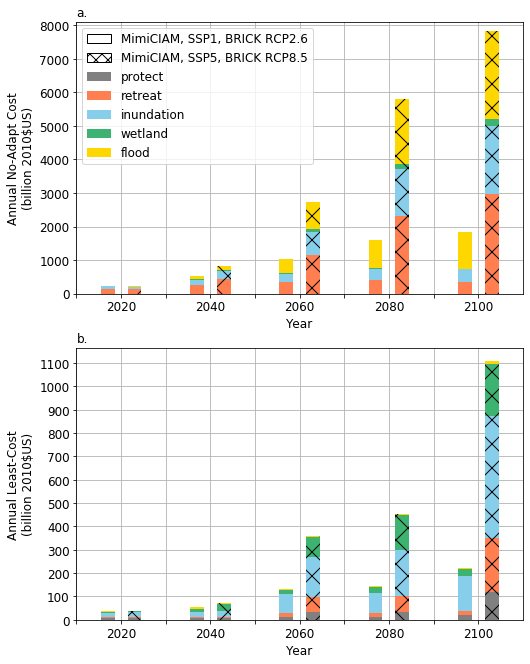

In [22]:
sep = 2
wid = 3.1
cost_cols = {"protect" : "gray", "retreat" : "coral", "inundation" : "skyblue", "wetland" : "mediumseagreen", "flood" : "gold"}
times_plot = list(range(2010,2110,10))
idx_plot = [1,3,5,7,9]
times_plot = np.array([times_plot[k] for k in idx_plot])
hat = [1*'.', 1*'/', 1*'x']
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,11))
# PANEL A: NO ADAPTATION COSTS
pan = 0
# set up for the legend
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", edgecolor="black", label="MimiCIAM, SSP1, BRICK RCP2.6")
ax[0].bar(x=times_plot[0], height=1, width=.5, color="white", hatch=2*hat[2], edgecolor="black", label="MimiCIAM, SSP5, BRICK RCP8.5")
# BRICK SLR RCP2.6 & SSP1 pop/GDP
ax[0].bar(x=times_plot-1.5*sep, height=1, width=.5, color=cost_cols["protect"], label="protect")
ax[0].bar(x=times_plot-1.5*sep, height=df_SSP1_BRICK26.RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], label="retreat")
ax[0].bar(x=times_plot-1.5*sep, height=df_SSP1_BRICK26.FloodNoAdapt[idx_plot], bottom=np.array(df_SSP1_BRICK26.RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[0].bar(x=times_plot-1.5*sep, height=df_SSP1_BRICK26.WetlandNoAdapt[idx_plot], bottom=np.array(df_SSP1_BRICK26.RelocateNoAdapt[idx_plot]+df_SSP1_BRICK26.FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[0].bar(x=times_plot-1.5*sep, height=df_SSP1_BRICK26.StormCapitalNoAdapt[idx_plot]+df_SSP1_BRICK26.StormPopNoAdapt[idx_plot], bottom=np.array(df_SSP1_BRICK26.RelocateNoAdapt[idx_plot]+df_SSP1_BRICK26.FloodNoAdapt[idx_plot]+df_SSP1_BRICK26.WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# BRICK SLR RCP8.5 & SSP5 pop/GDP
ax[0].bar(x=times_plot+1.5*sep, height=1, width=.5, color=cost_cols["protect"], hatch=hat[2])
ax[0].bar(x=times_plot+1.5*sep, height=df_SSP5_BRICK85.RelocateNoAdapt[idx_plot], width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[0].bar(x=times_plot+1.5*sep, height=df_SSP5_BRICK85.FloodNoAdapt[idx_plot], bottom=np.array(df_SSP5_BRICK85.RelocateNoAdapt[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[0].bar(x=times_plot+1.5*sep, height=df_SSP5_BRICK85.WetlandNoAdapt[idx_plot], bottom=np.array(df_SSP5_BRICK85.RelocateNoAdapt[idx_plot]+df_SSP5_BRICK85.FloodNoAdapt[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[0].bar(x=times_plot+1.5*sep, height=df_SSP5_BRICK85.StormCapitalNoAdapt[idx_plot]+df_SSP5_BRICK85.StormPopNoAdapt[idx_plot], bottom=np.array(df_SSP5_BRICK85.RelocateNoAdapt[idx_plot]+df_SSP5_BRICK85.FloodNoAdapt[idx_plot]+df_SSP5_BRICK85.WetlandNoAdapt[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2])
# other plot configuration options
ax[0].grid(); ax[0].set_axisbelow(True); ax[0].set_xlim([2010,2110]); ax[0].set_ylim([0,8100])
yticks = list(range(0,8100,1000)); ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)
ylims = ax[0].get_ylim(); top = ylims[1]*1.02; ax[0].text(2010,top, panels[pan], fontsize=12);

# PANEL B: OPTIMAL COSTS
pan += 1
# ctrl
ax[1].bar(x=times_plot-1.5*sep, height=df_SSP1_BRICK26.ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], label="protect")
ax[1].bar(x=times_plot-1.5*sep, height=df_SSP1_BRICK26.RetreatOptimal[idx_plot], bottom=np.array(df_SSP1_BRICK26.ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], label="retreat")
ax[1].bar(x=times_plot-1.5*sep, height=df_SSP1_BRICK26.InundationOptimal[idx_plot], bottom=np.array(df_SSP1_BRICK26.ProtectOptimal[idx_plot]+df_SSP1_BRICK26.RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], label="inundation")
ax[1].bar(x=times_plot-1.5*sep, height=df_SSP1_BRICK26.WetlandOptimal[idx_plot], bottom=np.array(df_SSP1_BRICK26.ProtectOptimal[idx_plot]+df_SSP1_BRICK26.RetreatOptimal[idx_plot]+df_SSP1_BRICK26.InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], label="wetland")
ax[1].bar(x=times_plot-1.5*sep, height=df_SSP1_BRICK26.FloodOptimal[idx_plot], bottom=np.array(df_SSP1_BRICK26.ProtectOptimal[idx_plot]+df_SSP1_BRICK26.RetreatOptimal[idx_plot]+df_SSP1_BRICK26.InundationOptimal[idx_plot]+df_SSP1_BRICK26.WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], label="flood")
# BRICK SLR RCP8.5 & SSP5 pop/GDP
ax[1].bar(x=times_plot+1.5*sep, height=df_SSP5_BRICK85.ProtectOptimal[idx_plot], width=wid, color=cost_cols["protect"], hatch=hat[2])
ax[1].bar(x=times_plot+1.5*sep, height=df_SSP5_BRICK85.RetreatOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]), width=wid, color=cost_cols["retreat"], hatch=hat[2])
ax[1].bar(x=times_plot+1.5*sep, height=df_SSP5_BRICK85.InundationOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]+df_SSP5_BRICK85.RetreatOptimal[idx_plot]), width=wid, color=cost_cols["inundation"], hatch=hat[2])
ax[1].bar(x=times_plot+1.5*sep, height=df_SSP5_BRICK85.WetlandOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]+df_SSP5_BRICK85.RetreatOptimal[idx_plot]+df_SSP5_BRICK85.InundationOptimal[idx_plot]), width=wid, color=cost_cols["wetland"], hatch=hat[2])
ax[1].bar(x=times_plot+1.5*sep, height=df_SSP5_BRICK85.FloodOptimal[idx_plot], bottom=np.array(df_SSP5_BRICK85.ProtectOptimal[idx_plot]+df_SSP5_BRICK85.RetreatOptimal[idx_plot]+df_SSP5_BRICK85.InundationOptimal[idx_plot]+df_SSP5_BRICK85.WetlandOptimal[idx_plot]), width=wid, color=cost_cols["flood"], hatch=hat[2]) 
# other plot configuration options
ax[1].grid(); ax[1].set_axisbelow(True); ax[1].set_xlim([2010,2110])
yticks = list(range(0,1200,100)); ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12)
ylims = ax[1].get_ylim(); top = ylims[1]*1.02; ax[1].text(2010,top, panels[pan], fontsize=12);
fig.savefig(plotdir+"/updates_comparison_rcp26_rcp85.pdf", bbox_inches='tight')

### Write an output CSV file with the plotted data

In [107]:
dfOut = pd.DataFrame(data={"year" : dfNew0.year,
                            "flood-noadapt-MimiCIAM-SSP1-BRICKRCP26" : df_SSP1_BRICK26.StormCapitalNoAdapt+df_SSP1_BRICK26.StormPopNoAdapt,
                            "wetland-noadapt-MimiCIAM-SSP1-BRICKRCP26" : df_SSP1_BRICK26.WetlandNoAdapt,
                            "inundation-noadapt-MimiCIAM-SSP1-BRICKRCP26" : df_SSP1_BRICK26.FloodNoAdapt,
                            "retreat-noadapt-MimiCIAM-SSP1-BRICKRCP26" : df_SSP1_BRICK26.RelocateNoAdapt,
                            "protect-noadapt-MimiCIAM-SSP1-BRICKRCP26" : [0]*len(df_SSP1_BRICK26.RelocateNoAdapt),
                            "flood-noadapt-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.StormCapitalNoAdapt+df_SSP5_BRICK85.StormPopNoAdapt,
                            "wetland-noadapt-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.WetlandNoAdapt,
                            "inundation-noadapt-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.FloodNoAdapt,
                            "retreat-noadapt-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.RelocateNoAdapt,
                            "protect-noadapt-MimiCIAM-SSP5-BRICKRCP85" : [0]*len(df_SSP5_BRICK85.RelocateNoAdapt),
                            "flood-leastcost-MimiCIAM-SSP1-BRICKRCP26" : df_SSP1_BRICK26.FloodOptimal,
                            "wetland-leastcost-MimiCIAM-SSP1-BRICKRCP26" : df_SSP1_BRICK26.WetlandOptimal,
                            "inundation-leastcost-MimiCIAM-SSP1-BRICKRCP26" : df_SSP1_BRICK26.FloodOptimal,
                            "retreat-leastcost-MimiCIAM-SSP1-BRICKRCP26" : df_SSP1_BRICK26.RetreatOptimal,
                            "protect-leastcost-MimiCIAM-SSP1-BRICKRCP26" : df_SSP1_BRICK26.ProtectOptimal,
                            "flood-leastcost-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.FloodOptimal,
                            "wetland-leastcost-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.WetlandOptimal,
                            "inundation-leastcost-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.FloodOptimal,
                            "retreat-leastcost-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.RetreatOptimal,
                            "protect-leastcost-MimiCIAM-SSP5-BRICKRCP85" : df_SSP5_BRICK85.ProtectOptimal})
filename_out = dir_julia + "/FigureData_comparison_SSP1-RCP26_SSP5-RCP85.csv"
dfOut.to_csv(filename_out, index=False)

### SSP1-RCP26 vs SSP5-RCP85

In [39]:
df_SSP1_BRICK26["Total"] = np.sum(df_SSP1_BRICK26[["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal"]],axis=1)
df_SSP1_BRICK26["Total NoAdapt"] = np.sum(df_SSP1_BRICK26[["StormCapitalNoAdapt","StormPopNoAdapt","RelocateNoAdapt","FloodNoAdapt","WetlandNoAdapt"]],axis=1)
print("SSP1-RCP26")
print(np.round(df_SSP1_BRICK26[["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]].iloc[idx_plot],2))
print(np.round(df_SSP1_BRICK26[["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot],2))

SSP1-RCP26
   FloodOptimal  WetlandOptimal  InundationOptimal  RetreatOptimal  \
1          0.76            5.35              19.03            4.53   
3          6.74           13.17              22.05            4.75   
5          1.58           20.31              80.50           15.07   
7          6.47           25.05              84.80           15.24   
9          4.64           26.91             149.89           18.48   

   ProtectOptimal   Total  
1            6.08   35.75  
3            6.08   52.79  
5           13.50  130.95  
7           13.50  145.06  
9           20.99  220.91  
   StormCapitalNoAdapt  StormPopNoAdapt  WetlandNoAdapt  FloodNoAdapt  \
1                 4.81             5.40            3.83         80.80   
3                46.39            46.73           10.95        170.00   
5               213.53           205.47           17.50        257.51   
7               441.11           391.31           21.67        337.53   
9               581.78           49

In [35]:
df_SSP5_BRICK85["Total"] = np.sum(df_SSP5_BRICK85[["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal"]],axis=1)
df_SSP5_BRICK85["Total NoAdapt"] = np.sum(df_SSP5_BRICK85[["StormCapitalNoAdapt","StormPopNoAdapt","RelocateNoAdapt","FloodNoAdapt","WetlandNoAdapt"]],axis=1)
print("SSP5-RCP85")
print(np.round(df_SSP5_BRICK85[["FloodOptimal","WetlandOptimal","InundationOptimal","RetreatOptimal","ProtectOptimal","Total"]].iloc[idx_plot],2))
print(np.round(df_SSP5_BRICK85[["StormCapitalNoAdapt","StormPopNoAdapt","WetlandNoAdapt","FloodNoAdapt","RelocateNoAdapt","Total NoAdapt"]].iloc[idx_plot],2))

SSP5-RCP85
   FloodOptimal  WetlandOptimal  InundationOptimal  RetreatOptimal  \
1          0.62            5.00              20.01            5.12   
3          6.67           30.21              24.78            5.65   
5          1.36           84.89             174.88           62.11   
7          7.67          149.33             195.70           68.31   
9         12.21          222.49             522.89          231.26   

   ProtectOptimal    Total  
1            6.49    37.25  
3            6.49    73.81  
5           33.90   357.15  
7           33.90   454.90  
9          120.69  1109.55  
   StormCapitalNoAdapt  StormPopNoAdapt  WetlandNoAdapt  FloodNoAdapt  \
1                 4.34             4.86            3.26         77.03   
3                54.62            54.72           28.96        260.80   
5               419.10           379.61           84.82        686.49   
7              1056.22           866.83          149.33       1412.81   
9              1452.48       

#### Numbers for paper

In [29]:
print("Average annual flood losses in SSP1-RCP2.6, in 2100:")
print("... with no adaptation:        ",np.round(df_SSP1_BRICK26[["StormCapitalNoAdapt","StormPopNoAdapt"]].iloc[9].sum(),2))
print("... with least-cost adaptation:",np.round(df_SSP1_BRICK26["FloodOptimal"].iloc[9],2))

print("\nAverage annual flood losses in SSP5-RCP8.5, in 2100:")
print("... with no adaptation:        ",np.round(df_SSP5_BRICK85[["StormCapitalNoAdapt","StormPopNoAdapt"]].iloc[9].sum(),2))
print("... with least-cost adaptation:",np.round(df_SSP5_BRICK85["FloodOptimal"].iloc[9],2))

Average annual flood losses in SSP1-RCP2.6, in 2100:
... with no adaptation:         1081.24
... with least-cost adaptation: 4.64

Average annual flood losses in SSP5-RCP8.5, in 2100:
... with no adaptation:         2616.11
... with least-cost adaptation: 12.21


Note that as rounded percentages, both of those give 100\%